# <center> Data 512 Final Project

# Introduction
The Seattle public library has 27 locations (list of locations can be found at https://www.spl.org/hours-and-locations). I would like to investigate the usage of the Seattle Public Library inventory. I am interested in seeing if I can find any insites to the checkout patterns of the inventory and the locations, and if any suggestions can be made to the library about their inventory. 

Through my analysis, I would like to answer the following questions: 
*   Is there a trend in digital material checkouts over printed material checkouts? I assume that there will be an increase in digital materials over time with the introduction of e-materials and e-readers.
*	Is there a correlation between library location and printed material checkout numbers over time? I believe that there will be a correlation between the location and the physical checkouts over time. 
*	Is there a correlation between “floating” material and checkout counts over time? I believe that there will some trends in these numbers. Floating material are items that can be checked out at one location and returned to another location. These items are also subject to move between locations to re-destribute the inventory between branches.
*	Are there any interesting trends in the types of items being checked out? I believe that books will likely be the highest checked out item at the library. Libraries have a large selection of items, but I believe most people will check out books from libraries rather than movies or some other item. 

# Project Background
The data I am using is collected and shared by the City of Seattle through their Open Data Program. This program makes data generated by the City of Seattle avialible to the public. For more information about the Open Data Program, please visit http://www.seattle.gov/tech/initiatives/open-data/about-the-open-data-program. The entier data use policy for this data can be found here: https://data.seattle.gov/stories/s/Data-Policy/6ukr-wvup/.

There are three datasets collected and maintained by the Seattle Public Library. I use all three to perform my analysis. These datasetts are: **Checkouts by Title**, **Library Collection Inventory** and **Integrated Library Systems (ILS) Data Dictionary**. These datasets are released under a public license.

## The Datasets

### Checkouts by Title:
This dataset is the monthly count of checkout titles starting in April 2005. This dataset includes printed and electronic versions of titles and their checkout counts aggregated by month. This data is updated monthly and publicly licensed. 

Here is the location to gather the data: https://data.seattle.gov/Community/Checkouts-by-Title/tmmm-ytt6

More information about this data set can be found in the Frequently Asked Questions PDF that can be found on the webpage above. I have provided a link for convince to the PDF here: https://data.seattle.gov/api/views/tmmm-ytt6/files/d37b9edc-c56f-46e4-aaea-cb882230cf3a?download=true&filename=Checkouts%20by%20Title%20FAQs.pdf

This data has 11 columns and 32.3 million rows. The columns are below:
+ UsageClass
+	CheckoutType
+	MaterialType
+	CheckoutYear
+	CheckoutMonth
+	Checkouts
+	Title
+	Creator
+	Subjects
+   Publisher
+   PublicationYear

### Library Collection Inventory:
This dataset is the library inventory for the entire Seattle Public Library Collection. This data is refreshed monthly starting September 1, 2017 (last updated Nov 6, 2018) and is publicly licensed. Each month appends that month’s inventory, it does not overwrite the previous months inventory.

Here is the location to gather the data: https://data.seattle.gov/Community/Library-Collection-Inventory/6vkj-f5xf

More information about this data set can be found in the Frequently Asked Questions PDF that can be found on the webpage above. I have provided a link for convince to the PDF here: https://data.seattle.gov/api/views/6vkj-f5xf/files/857144b6-5761-4ab4-81be-d36a3287a5cc?download=true&filename=Library%20Collection%20Inventory%20FAQs.pdf

The data has 13 columns and 20.2 million rows. The columns are: 
+	BibNum
+	Title
+	Author
+	ISBN
+	PublicationYear
+	Publisher
+	Subjects
+	ItemType
+	ItemCollection
+	FloatingItem
+	ItemLocation
+	ReportDate
+	ItemCount

### Integrated Library Systems (ILS) Data Dictionary:
This dataset contains the list of codes used in the Seattle Public Library’s datasets to categorize the titles. This data is updated yearly starting September 1, 2017 (last updated Nov 14, 2018), and is publicly licensed. 

Here is the location to gather the data: https://data.seattle.gov/Community/Integrated-Library-System-ILS-Data-Dictionary/pbt3-ytbc

The data has 7 columns and 571 rows. The columns are: 
+	Code
+	Description
+	Code Type
+	Format Group
+	Format Subgroup 
+	Category Group
+	Category Subgroup


## Data Collection
For my analysis, I downloaded the data straight to .csv files from https://data.seattle.gov/. However, you could use the API provided. 

Each dataset has an API and the documentation can be found at:
* Checkouts by Title [here](https://dev.socrata.com/foundry/data.seattle.gov/tjb6-zsmc)
* Library Collection Inventory: [here](https://dev.socrata.com/foundry/data.seattle.gov/d4ej-xh6a)
* Integrated Library Systems (ILS) Data Dictionary: [here](https://dev.socrata.com/foundry/data.seattle.gov/tjb6-zsmc)

These APIs are licensed under [CC BY-NC-SA 3.0](http://creativecommons.org/licenses/by-nc-sa/3.0/deed.en_US)


# Data Analysis

This section will go through my data analysis to answer each of my research questions. I provide the code I used to perform my analysis and create any visualizations. 

As you go through my notebook, you will notice I have locations where I will save a subset of data, or reload a  previously saved subset of data. I did this to be able to quickly load/reload a smaller set of data to perform some of my calculations. These can be commented in and out if desired. 

In [1]:
# Imports to run code below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I first begin by importing the three datasets. These files are fairly large, and the intial import will take a few minutes. 

In [2]:
checkouts_by_title = pd.read_csv("Checkouts_by_Title.csv", sep=',', header=0)

C:\Users\hanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
checkouts_by_title.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear
0,Physical,Horizon,BOOK,2005,9,2,Pacific Coast highway travelers guide,NaN,"Automobile travel Oregon Guidebooks, Automobil...",NaN,NaN
1,Physical,Horizon,BOOK,2005,9,2,Ariel and Emily,NaN,"Best friends Fiction, Friendship Fiction, Park...",NaN,NaN
2,Physical,Horizon,BOOK,2005,9,1,Mabon : celebrating the autumn equinox / Krist...,"Madden, Kristin, 1964-","Autumn festivals, Harvest festivals, Autumnal ...","Llewellyn Publications,",2002.
3,Physical,Horizon,BOOK,2005,9,1,Dr Dog,NaN,"Grooming, Cleanliness, Health, Hygiene Juvenil...",NaN,NaN
4,Physical,Horizon,BOOK,2005,9,1,<Unknown Title>,NaN,"Reproduction, Spanish language materials, Sex ...",NaN,NaN


In [4]:
library_collection_inventory = pd.read_csv("Library_Collection_Inventory.csv", sep=",", header=0)

In [5]:
library_collection_inventory.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,Floating,wts,10/01/2017,1
1,2599591,On the Edge/ Illona Andrews.,"Andrews, Ilona","0441017800, 9780441017805",c2009.,"Ace Books,",Fantasy fiction,acbk,nasf,NaN,bea,10/01/2017,1
2,2737188,Columbus : the four voyages / Laurence Bergreen.,"Bergreen, Laurence","1410441156, 9781410441157",2011.,"Thorndike Press,","Columbus Christopher Travel America, America D...",acbk,nalpnf,Floating,lcy,10/01/2017,1
3,2737711,"Hanukkah, oh Hanukkah / illustrated by Olga an...",NaN,"076145845X, 9780761458456",2011.,"Marshall Cavendish Children,","Childrens songs Texts Juvenile fiction, Hanukk...",jcbk,nchol,NaN,qna,10/01/2017,1
4,3081757,"Selected ambient works, 85-92 [sound recording...",Aphex Twin,NaN,[201-?],"Apollo Records,","Popular music 1981 1990, Popular music 1991 20...",accd,nacd,Floating,hip,10/01/2017,1


In [6]:
ils_data_dictionary = pd.read_csv("Integrated_Library_System__ILS__Data_Dictionary.csv", sep=",", header=0)

In [7]:
ils_data_dictionary.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,acart,Framed Art: Adult/YA,ItemType,Media,Art,NaN,NaN
1,acbk,Book: Adult/YA,ItemType,Print,Book,NaN,NaN
2,accas,Audio Tape: Adult/YA,ItemType,Media,Audio Tape,NaN,NaN
3,accd,CD: Adult/YA,ItemType,Media,Audio Disc,NaN,NaN
4,accdrom,CD-ROM: Adult/YA,ItemType,Media,Data Disc,NaN,NaN


##  Reserach Question 1: Is there a trend in printed material checkouts over digital material checkouts?
I would like to better understand the checkout trends of these catagories to understand if the introduction of e-books and e-readers is having an affect on material checkouts by the Seattle Public Library. 

I would like to create 3 visualizations for this question:
*    Checkouts by Year to understand yearly trends
*    Checkouts by Month to understand if there are any seasonal trends in checkouts
*    Checkouts Over Time to see in more detail checkout trends by digital and physial materials

The first step I perform is adding a report date column to the dataset. I do this because I would like to eventually plot the checkouts over time.

In [12]:
# I create year, month day columns that will be used to create a report_date
checkouts_by_title["year"] = checkouts_by_title["CheckoutYear"]
checkouts_by_title["month"] = checkouts_by_title["CheckoutMonth"]
checkouts_by_title["day"] = 1 #using one becuase the Library Inventory Collection is collected the first of each month

In [13]:
checkouts_by_title["report_date"] = pd.to_datetime(checkouts_by_title[['year', 'month', 'day']])

In [14]:
checkouts_by_title.head()

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,year,month,day,report_date
0,Physical,Horizon,BOOK,2005,9,2,Pacific Coast highway travelers guide,NaN,"Automobile travel Oregon Guidebooks, Automobil...",NaN,NaN,2005,9,1,2005-09-01
1,Physical,Horizon,BOOK,2005,9,2,Ariel and Emily,NaN,"Best friends Fiction, Friendship Fiction, Park...",NaN,NaN,2005,9,1,2005-09-01
2,Physical,Horizon,BOOK,2005,9,1,Mabon : celebrating the autumn equinox / Krist...,"Madden, Kristin, 1964-","Autumn festivals, Harvest festivals, Autumnal ...","Llewellyn Publications,",2002.,2005,9,1,2005-09-01
3,Physical,Horizon,BOOK,2005,9,1,Dr Dog,NaN,"Grooming, Cleanliness, Health, Hygiene Juvenil...",NaN,NaN,2005,9,1,2005-09-01
4,Physical,Horizon,BOOK,2005,9,1,<Unknown Title>,NaN,"Reproduction, Spanish language materials, Sex ...",NaN,NaN,2005,9,1,2005-09-01


Here I divide this dataset into 14 datasets by year. I do this to ease the calculation by year of physical vs electronic checkouts. This will also be useful because the Library Collection Inventory data is only from September 2017 to December 2018, and I can use a reduced dataset for further investigations

In [15]:
checkouts_2005 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2005]
checkouts_2006 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2006]
checkouts_2007 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2007]
checkouts_2008 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2008]
checkouts_2009 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2009]
checkouts_2010 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2010]
checkouts_2011 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2011]
checkouts_2012 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2012]
checkouts_2013 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2013]
checkouts_2014 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2014]
checkouts_2015 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2015]
checkouts_2016 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2016]
checkouts_2017 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2017]
checkouts_2018 = checkouts_by_title[checkouts_by_title.CheckoutYear == 2018]

In [16]:
## save these to csv files in case I need to load specific years and dont want to load the whole dataset...
checkouts_2005.to_csv('checkouts_2005.csv')
checkouts_2006.to_csv('checkouts_2006.csv')
checkouts_2007.to_csv('checkouts_2007.csv')
checkouts_2008.to_csv('checkouts_2008.csv')
checkouts_2009.to_csv('checkouts_2009.csv')
checkouts_2010.to_csv('checkouts_2010.csv')
checkouts_2011.to_csv('checkouts_2011.csv')
checkouts_2012.to_csv('checkouts_2012.csv')
checkouts_2013.to_csv('checkouts_2013.csv')
checkouts_2014.to_csv('checkouts_2014.csv')
checkouts_2015.to_csv('checkouts_2015.csv')
checkouts_2016.to_csv('checkouts_2016.csv')
checkouts_2017.to_csv('checkouts_2017.csv')
checkouts_2018.to_csv('checkouts_2018.csv')

Now that I have the datasets in managble chunks, I want to calculate the number of checkouts UsageClass (Physical or Digital). To do this, I use the *.groupby* function. I found information on this functionality [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/).

First I will perform this task on the 2005 subset, and show what the resulting datatable will look like. I will then perform it on the subset for 2006-2018. I do this at the subset level to speed up the calculation time. Then I will combine the resulting data into one dataset to create my visualizations.

In [17]:
checkouts_by_type_2005 = checkouts_2005.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()

In [18]:
checkouts_by_type_2005.head()

,year,month,UsageClass,MaterialType,Checkouts
0,2005,4,Physical,ATLAS,26
1,2005,4,Physical,BOOK,143053
2,2005,4,Physical,CR,916
3,2005,4,Physical,ER,10
4,2005,4,Physical,"ER, VIDEODISC",42


In [19]:
checkouts_by_type_2006 = checkouts_2006.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2007 = checkouts_2007.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2008 = checkouts_2008.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2009 = checkouts_2009.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2010 = checkouts_2010.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2011 = checkouts_2011.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2012 = checkouts_2012.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2013 = checkouts_2013.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2014 = checkouts_2014.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2015 = checkouts_2015.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2016 = checkouts_2016.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()
checkouts_by_type_2017 = checkouts_2017.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()

For 2018, some checkouts exceeded 1000 checkouts, and therefore included commas in the number. Therefor *Checkouts* has a mix of number and strings. To fix this, I need to remove the commas in the values that had checkouts over 1000, and then convert them to integers before I can group the checkouts by "UsageClass". I found a quick solution to this issue [here](https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python).

In [21]:
# see all unique values in Checkouts... note that there is a mixutre of numbers and strings
checkouts_2018.Checkouts.unique()

array([4, 1, 2, 21, 5, 3, 6, 7, 11, 10, 34, 19, 9, 35, 16, 64, 8, 13, 12,
       30, 17, 20, 22, 18, 15, 79, 50, 61, 32, 95, 23, 14, 24, 71, 38, 29,
       43, 44, 25, 39, 28, 26, 65, 105, 56, 42, 58, 84, 51, 106, 81, 27,
       82, 62, 66, 59, 46, 57, 41, 114, 86, 85, 540, 89, 80, 78, 76, 60,
       55, 54, 176, 47, 31, 40, 354, 48, 495, 37, 282, 119, 141, 251, 102,
       143, 49, 63, 87, 33, 179, 70, 99, 52, 92, 53, 68, 45, 72, 122, 123,
       667, 117, 97, 96, 121, 183, 241, 36, 157, 277, 130, 568, 110, 90,
       77, 100, 601, 158, 200, 136, 187, 479, 399, 75, 67, 284, 170, 132,
       164, 73, 551, 142, 69, '2', '9', '7', '6', '4', '10', '1', '14',
       '3', '11', '5', '35', '15', '8', '28', '13', '16', '67', '37',
       '19', '20', '59', '21', '32', '25', '12', '53', '155', '17', '42',
       '43', '24', '29', '30', '185', '26', '46', '60', '103', '54', '44',
       '45', '52', '27', '23', '38', '18', '66', '75', '31', '33', '34',
       '158', '156', '138', '627', '76', '11

In [22]:
# replace the , with nothing
checkouts_2018["Checkouts"] = checkouts_2018["Checkouts"].replace({",":''}, regex = True)
# change the all the values to integers
checkouts_2018["Checkouts"] = checkouts_2018["Checkouts"].astype('int64')

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [23]:
# check that that code worked....
checkouts_2018.Checkouts.unique()

array([   4,    1,    2,   21,    5,    3,    6,    7,   11,   10,   34,
         19,    9,   35,   16,   64,    8,   13,   12,   30,   17,   20,
         22,   18,   15,   79,   50,   61,   32,   95,   23,   14,   24,
         71,   38,   29,   43,   44,   25,   39,   28,   26,   65,  105,
         56,   42,   58,   84,   51,  106,   81,   27,   82,   62,   66,
         59,   46,   57,   41,  114,   86,   85,  540,   89,   80,   78,
         76,   60,   55,   54,  176,   47,   31,   40,  354,   48,  495,
         37,  282,  119,  141,  251,  102,  143,   49,   63,   87,   33,
        179,   70,   99,   52,   92,   53,   68,   45,   72,  122,  123,
        667,  117,   97,   96,  121,  183,  241,   36,  157,  277,  130,
        568,  110,   90,   77,  100,  601,  158,  200,  136,  187,  479,
        399,   75,   67,  284,  170,  132,  164,   73,  551,  142,   69,
        155,  185,  103,  156,  138,  627,   83,  267,   93,  586,  109,
        654,  124,  107,  543,  134,  108,   88,  1

In [24]:
checkouts_by_type_2018 = checkouts_2018.groupby(["year", "month", "UsageClass", "MaterialType"],
                                                as_index = False)[['Checkouts']].sum()

In [25]:
checkouts_by_type_2018.head()

,year,month,UsageClass,MaterialType,Checkouts
0,2018,1,Digital,AUDIOBOOK,74591
1,2018,1,Digital,COMIC,3805
2,2018,1,Digital,EBOOK,150770
3,2018,1,Digital,MAGAZINE,4910
4,2018,1,Digital,MOVIE,4429


In [26]:
# save the cleaned version of checkouts_2018 for potential future use....
checkouts_2018.to_csv('checkouts_2018_rev1.csv')

Below is where I combine the *checkouts_by_type* data into one large dataset. More information on combining dataframes in various ways can be found [here]( https://pandas.pydata.org/pandas-docs/stable/merging.html)

In [27]:
# for pd.concat() I need to create a list of dataframes first....
dfs = [checkouts_by_type_2005, checkouts_by_type_2006, checkouts_by_type_2007, checkouts_by_type_2008,
       checkouts_by_type_2009, checkouts_by_type_2010, checkouts_by_type_2011, checkouts_by_type_2012,
       checkouts_by_type_2013, checkouts_by_type_2014, checkouts_by_type_2015, checkouts_by_type_2016,
       checkouts_by_type_2017, checkouts_by_type_2018]

In [28]:
# join the datasets
checkouts_by_type = pd.concat(dfs, ignore_index = True, sort = True)

In [29]:
checkouts_by_type.head()

,Checkouts,MaterialType,UsageClass,month,year
0,26,ATLAS,Physical,4,2005
1,143053,BOOK,Physical,4,2005
2,916,CR,Physical,4,2005
3,10,ER,Physical,4,2005
4,42,"ER, VIDEODISC",Physical,4,2005


I didn't include the *report_date* column when I created the *checkouts_by_type* datasets, so I will add that back in, and save the resulting data table

In [30]:
checkouts_by_type["day"] = 1 # create a day column

checkouts_by_type["report_date"] = pd.to_datetime(checkouts_by_type[['year', 'month', 'day']]) # create report_date
checkouts_by_type.head(1)

,Checkouts,MaterialType,UsageClass,month,year,day,report_date
0,26,ATLAS,Physical,4,2005,1,2005-04-01


In [31]:
# I will save this table in case I need to reload this data.
checkouts_by_type.to_csv('checkouts_by_type.csv')

I am interested to see if there are any trends over time.

I selected three different visualizations for this:
* trend by year
* trend by month
* trend over time

I need to create a few different tables in order to plot this information. 

In [32]:
#create datasets for the physical and digital checkouts
physical_checkouts = checkouts_by_type[checkouts_by_type["UsageClass"] == "Physical"]
digital_checkouts = checkouts_by_type[checkouts_by_type["UsageClass"] == "Digital"]

# for plotting by year, I need to group the tables by year.
physical_checkouts_by_year = physical_checkouts.groupby("year", as_index = False)[["Checkouts"]].sum()
digital_checkouts_by_year = digital_checkouts.groupby("year", as_index = False)[["Checkouts"]].sum()

# for plotting by month of the year, I need to group the table by month
physical_checkouts_by_month = physical_checkouts.groupby("month", as_index = False)[["Checkouts"]].sum()
digital_checkouts_by_month = digital_checkouts.groupby("month", as_index = False)[["Checkouts"]].sum()

# for plotting by year and month, I need to group the table by report_date
physical_checkouts_over_time = physical_checkouts.groupby("report_date", as_index = False)[["Checkouts"]].sum()
digital_checkouts_over_time = digital_checkouts.groupby("report_date", as_index = False)[["Checkouts"]].sum()

to create these visualizations I found help in the *matplotlib* documentation found [here](https://matplotlib.org/examples/api/barchart_demo.html).

### Checkouts by Type (Yearly)

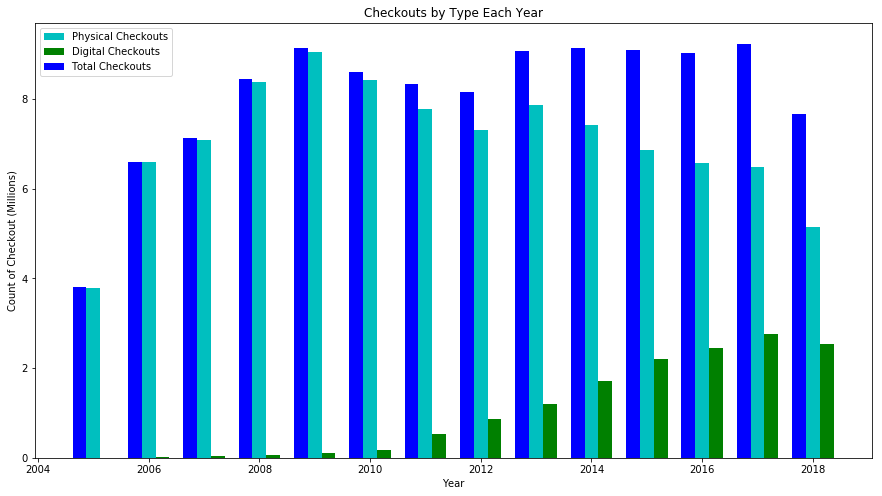

In [33]:
# create plot by aggrigated by year

fig, ax = plt.subplots(figsize=(15, 8))
ind = np.arange(2005, 2019, 1)
width = .25

phys_checkouts = physical_checkouts_by_year["Checkouts"]
digi_checkouts = digital_checkouts_by_year["Checkouts"]


rects1 = plt.bar(ind, phys_checkouts, width, color = "c", label='Physical Checkouts')

rects2 = plt.bar(ind + width, digi_checkouts, width, color = "g",label='Digital Checkouts')

rects3 = plt.bar(ind - width, phys_checkouts + digi_checkouts, width, color = "b", label = "Total Checkouts")

# this is a function to create my y-axis tick marks in groups of 1,000,000 checkouts.
def checkout_ticks(count, ticks):
    value = count / 1000000
    return int(value)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))
 
plt.xlabel('Year')
plt.ylabel('Count of Checkout (Millions)')
plt.title('Checkouts by Type Each Year')

plt.legend()

plt.savefig('checkouts_by_type_each_year.png', bbox_inches='tight')

This chart shows a steady increase in checkouts over time to 2009, a slight dip until 2012, and then an increase and hold from 2013 to 2017. This chart also shows a steady increase of digital checkouts from 2005 to 2018. I would guess that this is due to the fact that when I pulled this data, the most recent update was in November, therefore it only had data through October. I would expect if you pulled this data in Jan 2019, and performed this, the trend of increased digital checkouts would continue. 

### Checkouts by Type (Monthly)

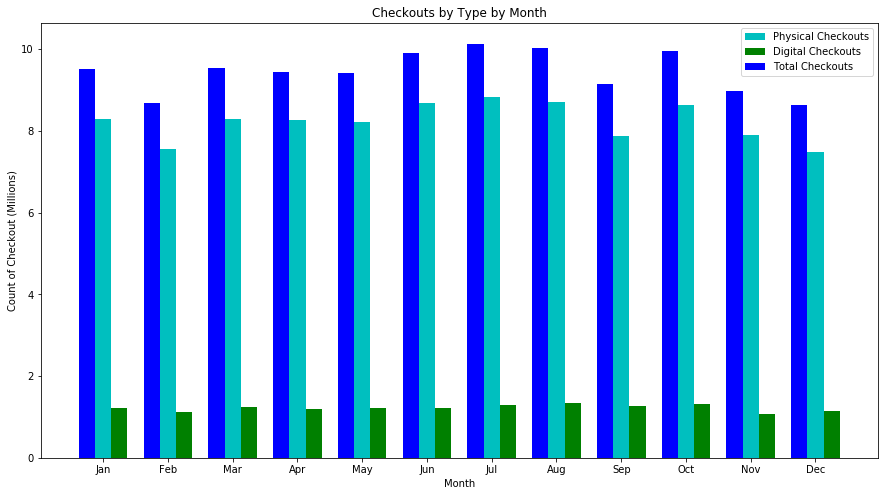

In [34]:
# create plot aggrigated by month

fig, ax = plt.subplots(figsize=(15, 8))
ind = np.arange(1, 13, 1)
width = .25

phys_checkouts = physical_checkouts_by_month["Checkouts"]
digi_checkouts = digital_checkouts_by_month["Checkouts"]

rects1 = plt.bar(ind, phys_checkouts, width, color='c', label='Physical Checkouts')

rects2 = plt.bar(ind + width, digi_checkouts, width, color='g', label='Digital Checkouts')

rects3 = plt.bar(ind - width, phys_checkouts + digi_checkouts, width, color = 'b', label = "Total Checkouts")

# this is a function to create my y-axis tick marks in groups of 1,000,000 checkouts.
def checkout_ticks(count, ticks):
    value = count / 1000000
    return int(value)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

ax.set_xticks(ind)
ax.set_xticklabels(('Jan','Feb', 'Mar', 'Apr', 'May', "Jun", 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'))
 
plt.xlabel('Month')
plt.ylabel('Count of Checkout (Millions)')
plt.title('Checkouts by Type by Month')

plt.legend()

plt.savefig('checkouts_by_type_by_month.png', bbox_inches='tight')

This chart shows that there is no drastic change in checkouts by month, so there is likely no seasonal changes in checkout counts. You can see Febuary takes a small dive, which can probably caused by Febuary having less days than the other months. You can also see September, November and December ave a little less checkouts than the other months. Further invenstigation will be needed to explaint this, however, I will not cover this in my analysis.

### Checkouts by Type

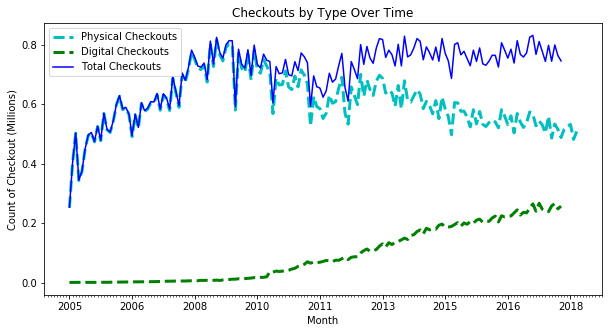

In [35]:
# Checkouts by type over time

from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize = (10, 5))
ind = np.arange(1, 180, 1)


phys_checkouts = physical_checkouts_over_time["Checkouts"]
digi_checkouts = digital_checkouts_over_time["Checkouts"]
 
line1 = plt.plot(phys_checkouts,color = "c", label='Physical Checkouts', linewidth=3.0, ls = "--")
line2 = plt.plot(digi_checkouts, color="g",  label='Digital Checkouts', linewidth=3.0, ls= "--")
line3 = plt.plot(phys_checkouts + digi_checkouts, color = 'b', label = "Total Checkouts")


# this is a function to create my y-axis tick marks in groups of 1,000,000 checkouts.
def checkout_ticks(count, ticks):
    value = count / 1000000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

# this is a function to create my x-axis tick marks
def year_ticks(month, ticks):
    year = month / 12
    return int(year) + 2005

ax.xaxis.set_major_formatter(plt.FuncFormatter(year_ticks))

minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)



plt.xlabel('Month')
plt.ylabel('Count of Checkout (Millions)')
plt.title('Checkouts by Type Over Time')

plt.legend()

plt.savefig('checkouts_by_type_over_time.png', bbox_inches='tight')

As you can see from the chart above, the checkouts over time steaily grow until about 2009. They then dip slightly, rise back up, and hold fairly constant. What is interesting to see, that matches with my assumptions is that the digital checkout numbers grow steadiy over time, and the pysical checkouts begin decreasing. From this chart, you can also see the monthly variation that you could not see from the above two bar graphs.

### Reserach Question 1a:  Are there any changes in the most freequently checked out titles as time goes on?

A follow on to the question of checkouts of physical versus electronic checkouts was seeing if there was any changes by year on the Top most checked out Titles. Below I will create a series of tables for each year for the 10 most checked out titles.

I first need to group the data by the year, Title, Useage Class, Material Type, and Checkouts. I will then sort these values by the highest checkout and dispaly a table for each year. 

I will do a quick example for 2005, and then perform this on 2006-2018.

In [36]:
checkouts_by_title_2005 = checkouts_2005.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()

In [37]:
top_title_2005 = checkouts_by_title_2005.sort_values(by = "Checkouts", ascending = False).head(10)

In [38]:
top_title_2005

,year,Title,UsageClass,MaterialType,Checkouts
2895,2005,<Unknown Title>,Physical,BOOK,11793
2903,2005,<Unknown Title>,Physical,VIDEODISC,8384
2901,2005,<Unknown Title>,Physical,SOUNDDISC,8050
2902,2005,<Unknown Title>,Physical,VIDEOCASS,5107
95829,2005,Greatest hits,Physical,SOUNDDISC,1915
267575,2005,Uncataloged Folder or Bag--DWN,Physical,BOOK,1905
267568,2005,Uncataloged Folder or Bag--BAL,Physical,BOOK,1401
99718,2005,Harry Potter and the half-blood prince / by J....,Physical,BOOK,1215
267584,2005,Uncataloged Folder or Bag--NET,Physical,BOOK,1192
32315,2005,Board Books 2000 2001 2002 2003,Physical,BOOK,1091


Now for the rest of the years.

In [39]:
checkouts_by_title_2006 = checkouts_2006.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2007 = checkouts_2007.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2008 = checkouts_2008.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2009 = checkouts_2009.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2010 = checkouts_2010.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2011 = checkouts_2011.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2012 = checkouts_2012.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2013 = checkouts_2013.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2014 = checkouts_2014.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2015 = checkouts_2015.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2016 = checkouts_2016.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2017 = checkouts_2017.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()
checkouts_by_title_2018 = checkouts_2018.groupby(["year", "Title", "UsageClass", "MaterialType"], as_index = False)[['Checkouts']].sum()

In [40]:
top_title_2006 = checkouts_by_title_2006.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2007 = checkouts_by_title_2007.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2008 = checkouts_by_title_2008.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2009 = checkouts_by_title_2009.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2010 = checkouts_by_title_2010.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2011 = checkouts_by_title_2011.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2012 = checkouts_by_title_2012.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2013 = checkouts_by_title_2013.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2014 = checkouts_by_title_2014.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2015 = checkouts_by_title_2015.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2016 = checkouts_by_title_2016.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2017 = checkouts_by_title_2017.sort_values(by = "Checkouts", ascending = False).head(10)
top_title_2018 = checkouts_by_title_2017.sort_values(by = "Checkouts", ascending = False).head(10)

#### 10 Most Checked Out Titles for 2005

In [41]:
top_title_2005

,year,Title,UsageClass,MaterialType,Checkouts
2895,2005,<Unknown Title>,Physical,BOOK,11793
2903,2005,<Unknown Title>,Physical,VIDEODISC,8384
2901,2005,<Unknown Title>,Physical,SOUNDDISC,8050
2902,2005,<Unknown Title>,Physical,VIDEOCASS,5107
95829,2005,Greatest hits,Physical,SOUNDDISC,1915
267575,2005,Uncataloged Folder or Bag--DWN,Physical,BOOK,1905
267568,2005,Uncataloged Folder or Bag--BAL,Physical,BOOK,1401
99718,2005,Harry Potter and the half-blood prince / by J....,Physical,BOOK,1215
267584,2005,Uncataloged Folder or Bag--NET,Physical,BOOK,1192
32315,2005,Board Books 2000 2001 2002 2003,Physical,BOOK,1091


#### 10 Most Checked Out Titles for 2006

In [42]:
top_title_2006

,year,Title,UsageClass,MaterialType,Checkouts
3269,2006,<Unknown Title>,Physical,VIDEODISC,18562
3261,2006,<Unknown Title>,Physical,BOOK,15148
3267,2006,<Unknown Title>,Physical,SOUNDDISC,11352
3268,2006,<Unknown Title>,Physical,VIDEOCASS,5743
107061,2006,Greatest hits,Physical,SOUNDDISC,3173
92571,2006,Flightplan [videorecording] / Touchstone Pictu...,Physical,VIDEODISC,2564
305610,2006,Uncataloged Folder or Bag--DWN,Physical,BOOK,2437
40057,2006,Broken flowers [videorecording] / Bac Films ; ...,Physical,VIDEODISC,2341
176718,2006,March of the penguins [videorecording] / Bonne...,Physical,VIDEODISC,2316
277277,2006,The constant gardener [videorecording] / Potbo...,Physical,VIDEODISC,2294


#### 10 Most Checked Out Titles for 2007

In [43]:
top_title_2007

,year,Title,UsageClass,MaterialType,Checkouts
3489,2007,<Unknown Title>,Physical,VIDEODISC,17678
3481,2007,<Unknown Title>,Physical,BOOK,13312
3487,2007,<Unknown Title>,Physical,SOUNDDISC,11186
3488,2007,<Unknown Title>,Physical,VIDEOCASS,3767
111228,2007,Greatest hits,Physical,SOUNDDISC,3084
174493,2007,Little Miss Sunshine [videorecording] / Big Be...,Physical,VIDEODISC,2335
289541,2007,The devil wears Prada [videorecording] / 20th ...,Physical,VIDEODISC,2296
318838,2007,Uncataloged Folder or Bag--DWN,Physical,BOOK,2196
288644,2007,The constant gardener [videorecording] / Potbo...,Physical,VIDEODISC,2187
318831,2007,Uncataloged Folder or Bag--BAL,Physical,BOOK,2173


#### 10 Most Checked Out Titles for 2008

In [44]:
top_title_2008

,year,Title,UsageClass,MaterialType,Checkouts
3810,2008,<Unknown Title>,Physical,VIDEODISC,20263
3803,2008,<Unknown Title>,Physical,BOOK,11784
3808,2008,<Unknown Title>,Physical,SOUNDDISC,9471
200254,2008,Michael Clayton [videorecording] / Warner Bros...,Physical,VIDEODISC,4957
217028,2008,No country for old men [videorecording] / Mira...,Physical,VIDEODISC,4693
161849,2008,Into the wild [videorecording] / Paramount Van...,Physical,VIDEODISC,4617
170514,2008,Juno [videorecording] / Fox Searchlight Pictur...,Physical,VIDEODISC,4386
114232,2008,Gone baby gone [videorecording] / Miramax Film...,Physical,VIDEODISC,4022
345019,2008,Waitress [videorecording] / Fox Searchlight Pi...,Physical,VIDEODISC,4008
293043,2008,The Darjeeling Limited [videorecording] / Amer...,Physical,VIDEODISC,3833


#### 10 Most Checked Out Titles for 2009

In [45]:
top_title_2009

,year,Title,UsageClass,MaterialType,Checkouts
4064,2009,<Unknown Title>,Physical,VIDEODISC,21701
4056,2009,<Unknown Title>,Physical,BOOK,10623
4062,2009,<Unknown Title>,Physical,SOUNDDISC,7746
48687,2009,Burn after reading [videorecording] / Focus Fe...,Physical,VIDEODISC,6152
170742,2009,Juno [videorecording] / Fox Searchlight Pictur...,Physical,VIDEODISC,5501
161955,2009,Into the wild [videorecording] / Paramount Van...,Physical,VIDEODISC,5321
352816,2009,Vicky Cristina Barcelona [videorecording] / Th...,Physical,VIDEODISC,5167
201323,2009,Michael Clayton [videorecording] / Warner Bros...,Physical,VIDEODISC,4952
85084,2009,Doubt [videorecording] / Miramax Films ; produ...,Physical,VIDEODISC,4853
313221,2009,The dark knight [videorecording] / Warner Bros...,Physical,VIDEODISC,4795


#### 10 Most Checked Out Titles for 2010

In [46]:
top_title_2010

,year,Title,UsageClass,MaterialType,Checkouts
4106,2010,<Unknown Title>,Physical,VIDEODISC,19398
4098,2010,<Unknown Title>,Physical,BOOK,8200
85454,2010,Doubt [videorecording] / Miramax Films ; produ...,Physical,VIDEODISC,5428
306403,2010,The curious case of Benjamin Button [videoreco...,Physical,VIDEODISC,5166
322701,2010,The reader [videorecording] / The Weinstein Co...,Physical,VIDEODISC,5016
263213,2010,Slumdog millionaire [videorecording] / Fox Sea...,Physical,VIDEODISC,4790
49268,2010,Burn after reading [videorecording] / Focus Fe...,Physical,VIDEODISC,4750
192190,2010,Milk [videorecording] / Focus Features in asso...,Physical,VIDEODISC,4728
348711,2010,Vicky Cristina Barcelona [videorecording] / Th...,Physical,VIDEODISC,4723
236419,2010,Rachel getting married [videorecording] / Sony...,Physical,VIDEODISC,4564


#### 10 Most Checked Out Titles for 2011

In [47]:
top_title_2011

,year,Title,UsageClass,MaterialType,Checkouts
4738,2011,<Unknown Title>,Physical,VIDEODISC,13961
4730,2011,<Unknown Title>,Physical,BOOK,5637
394430,2011,Up in the air [videorecording] / Paramount ; T...,Physical,VIDEODISC,3149
367539,2011,The reader [videorecording] / The Weinstein Co...,Physical,VIDEODISC,3018
4736,2011,<Unknown Title>,Physical,SOUNDDISC,2980
173515,2011,It's complicated [videorecording] / Universal ...,Physical,VIDEODISC,2953
362184,2011,The men who stare at goats [videorecording] / ...,Physical,VIDEODISC,2952
11232,2011,A serious man [videorecording] / Focus Feature...,Physical,VIDEODISC,2914
349601,2011,The curious case of Benjamin Button [videoreco...,Physical,VIDEODISC,2904
179742,2011,Julie & Julia [videorecording] / Columbia Pict...,Physical,VIDEODISC,2878


#### 10 Most Checked Out Titles for 2012

In [48]:
top_title_2012

,year,Title,UsageClass,MaterialType,Checkouts
4984,2012,<Unknown Title>,Physical,VIDEODISC,9090
4977,2012,<Unknown Title>,Physical,BOOK,3606
381165,2012,The hunger games / Suzanne Collins.,Physical,BOOK,2746
230935,2012,Moneyball [videorecording] / Columbia Pictures...,Physical,VIDEODISC,2684
226953,2012,Midnight in Paris [videorecording] / Sony Pict...,Physical,VIDEODISC,2668
56470,2012,Bridesmaids [videorecording] / Universal Pictu...,Physical,VIDEODISC,2642
380241,2012,The help [videorecording] / Touchstone Picture...,Physical,VIDEODISC,2619
326713,2012,Super 8 [videorecording] / Paramount ; Amblin ...,Physical,VIDEODISC,2564
83204,2012,"Crazy, stupid, love [videorecording] / Warner ...",Physical,VIDEODISC,2539
381349,2012,The ides of March [videorecording] / Columbia ...,Physical,VIDEODISC,2484


#### 10 Most Checked Out Titles for 2013

In [49]:
top_title_2013

,year,Title,UsageClass,MaterialType,Checkouts
5408,2013,<Unknown Title>,Physical,VIDEODISC,5257
34259,2013,Argo [videorecording] / Warner Bros. ; GK Film...,Physical,VIDEODISC,4649
471999,2013,"Where'd you go, Bernadette : a novel / Maria S...",Physical,BOOK,3977
218822,2013,Life of Pi [videorecording] / 20th Century Fox...,Physical,VIDEODISC,3863
169866,2013,Homeland. The complete first season [videoreco...,Physical,VIDEODISC,3590
151689,2013,Gone girl : a novel / Gillian Flynn.,Physical,BOOK,3542
219969,2013,Lincoln [videorecording] / Touchstone Pictures...,Physical,VIDEODISC,3514
327464,2013,Silver linings playbook [videorecording] / the...,Physical,VIDEODISC,3480
363271,2013,The Bourne legacy [videorecording] / a Univers...,Physical,VIDEODISC,3348
412257,2013,The hunger games [videorecording] / directed b...,Physical,VIDEODISC,3324


#### 10 Most Checked Out Titles for 2014

In [50]:
top_title_2014

,year,Title,UsageClass,MaterialType,Checkouts
28916,2014,American hustle [videorecording] / Columbia Pi...,Physical,VIDEODISC,4190
97283,2014,Dallas buyers club [videorecording] / Focus Fe...,Physical,VIDEODISC,4175
2172,2014,12 years a slave [videorecording] / Fox Search...,Physical,VIDEODISC,4018
58934,2014,Blue Jasmine [videorecording] / Sony Pictures ...,Physical,VIDEODISC,3991
71666,2014,Captain Phillips [videorecording] / Columbia P...,Physical,VIDEODISC,3966
160067,2014,Gravity [videorecording] / Warner Bros. Pictur...,Physical,VIDEODISC,3957
458899,2014,The wolf of Wall Street [videorecording] / Par...,Physical,VIDEODISC,3910
267786,2014,Nebraska [videorecording] / Paramount Vantage ...,Physical,VIDEODISC,3848
157542,2014,Gone Girl: A Novel,Digital,EBOOK,3550
326896,2014,Saving Mr. Banks [videorecording] / Walt Disne...,Physical,VIDEODISC,3252


#### 10 Most Checked Out Titles for 2015

In [51]:
top_title_2015

,year,Title,UsageClass,MaterialType,Checkouts
172437,2015,Gone girl [videorecording] / Twentieth Century...,Physical,VIDEODISC,4375
477554,2015,The imitation game [videorecording] / The Wein...,Physical,VIDEODISC,4235
68790,2015,Boyhood [videorecording] / IFC Films ; IFC Pro...,Physical,VIDEODISC,4052
60225,2015,"Birdman, or (the unexpected virtue of ignoranc...",Physical,VIDEODISC,4029
28146,2015,All the Light We Cannot See: A Novel,Digital,EBOOK,3917
499265,2015,The theory of everything [videorecording] / Fo...,Physical,VIDEODISC,3716
218275,2015,Interstellar [videorecording] / Paramount Pict...,Physical,VIDEODISC,3489
422027,2015,The Economist,Digital,MAGAZINE,3471
426914,2015,The Grand Budapest Hotel [videorecording] / Fo...,Physical,VIDEODISC,3400
546374,2015,Whiplash [videorecording] / Sony Pictures Clas...,Physical,VIDEODISC,3398


#### 10 Most Checked Out Titles for 2016

In [52]:
top_title_2016

,year,Title,UsageClass,MaterialType,Checkouts
380789,2016,SPL HotSpot : connecting Seattle / [distribute...,Physical,MIXED,7342
454218,2016,The Economist,Digital,MAGAZINE,4615
470955,2016,The Martian [videorecording] / Twentieth Centu...,Physical,VIDEODISC,4355
77008,2016,Bridge of spies [videorecording] / Touchstone ...,Physical,VIDEODISC,4006
474286,2016,The New Yorker,Digital,MAGAZINE,3931
500005,2016,The big short [videorecording] / Paramount Pic...,Physical,VIDEODISC,3846
414700,2016,Spotlight [videorecording] / directed by Tom M...,Physical,VIDEODISC,3489
233787,2016,Inside out [videorecording] / Disney ; Pixar A...,Physical,VIDEODISC,3414
380776,2016,SPECTRE [videorecording] / Metro Goldwyn Mayer...,Physical,VIDEODISC,3370
470961,2016,The Martian: A Novel,Digital,EBOOK,3275


#### 10 Most Checked Out Titles for 2017

In [53]:
top_title_2017

,year,Title,UsageClass,MaterialType,Checkouts
409014,2017,SPL HotSpot : connecting Seattle / [distribute...,Physical,MIXED,7202
244448,2017,In Building Device Checkout,Physical,MIXED,6028
486730,2017,The Economist,Digital,MAGAZINE,4711
47491,2017,Arrival / Paramount Pictures ; Filmnation Ente...,Physical,VIDEODISC,4048
506457,2017,The New Yorker,Digital,MAGAZINE,3790
522340,2017,The Underground Railroad : a novel / Colson Wh...,Physical,BOOK,3525
219385,2017,Hillbilly elegy : a memoir of a family and cul...,Physical,BOOK,3458
218100,2017,Hidden figures / 20th Century Fox ; Fox 2000 P...,Physical,VIDEODISC,3238
323726,2017,Moonlight / A24 ; Plan B ; Pastel ; produced b...,Physical,VIDEODISC,3184
491709,2017,The Girl on the Train: A Novel,Digital,EBOOK,3184


#### 10 Most Checked Out Titles for 2018

In [54]:
top_title_2018

,year,Title,UsageClass,MaterialType,Checkouts
409014,2017,SPL HotSpot : connecting Seattle / [distribute...,Physical,MIXED,7202
244448,2017,In Building Device Checkout,Physical,MIXED,6028
486730,2017,The Economist,Digital,MAGAZINE,4711
47491,2017,Arrival / Paramount Pictures ; Filmnation Ente...,Physical,VIDEODISC,4048
506457,2017,The New Yorker,Digital,MAGAZINE,3790
522340,2017,The Underground Railroad : a novel / Colson Wh...,Physical,BOOK,3525
219385,2017,Hillbilly elegy : a memoir of a family and cul...,Physical,BOOK,3458
218100,2017,Hidden figures / 20th Century Fox ; Fox 2000 P...,Physical,VIDEODISC,3238
323726,2017,Moonlight / A24 ; Plan B ; Pastel ; produced b...,Physical,VIDEODISC,3184
491709,2017,The Girl on the Train: A Novel,Digital,EBOOK,3184


It is interesting to note that the top checked out Titles have "Unknown" as their titles for many of the years. I would guess that this is due to the data collection system changing in 2016.

The FAQs for the **Checkouts by Title** ([link here](https://data.seattle.gov/api/views/tmmm-ytt6/files/d37b9edc-c56f-46e4-aaea-cb882230cf3a?download=true&filename=Checkouts%20by%20Title%20FAQs.pdf)) dataset states:  

*"For historical physical item checkouts from April 2005 to September 30, 2016, the source of this data is the Legrady artwork data archives. For October 1 2016 to present, the source is the Horizon ILS."* 

I would guess that the older system was less accurate in it's Title data, and therefore my analysis grouped each of the "Unknown" titles by their Material Types (Book, Video Cassett, etc.). An additional analysis could be done to remove the "Unknown" titles from the dataset, and re-do the analysis.

You can also see that in 2014 and on, one digital checkout title made the top most checked out item list. 

## Research Question 2: Is there a correlation between library location and printed material checkout numbers over time?

I am interested in this question because physical material is the most checked out item at the Seattle public library. Since these items are physical items, it requries a person to visit an actual location in order to check these items out. Because of this, I want to investigate if the library branch could be a cause of this.

In order to answer this question, I first want to explor the **Library Collection Inventory** data. Then, once I understand a bit about this data I will answer this research question.

### Research Question 2a. Do Inventory levels by locaiton change over time?
I will create visualizations to answer this question:
*    Inventory levels by location each year (this data starts in September 2017 and goes through October 2018)
*    Inventory levels over time

I first need to create my datasets from the **Library Collection Inventory** data by grouping it by location.

In [55]:
inventory_by_location = library_collection_inventory.groupby(["ItemLocation", "ReportDate"], as_index = False)["ItemCount"].sum()

In [57]:
inventory_by_location.head()

,ItemLocation,ReportDate,ItemCount
0,GWD,01/01/2018,343
1,GWD,02/01/2018,189
2,GWD,03/01/2018,444
3,GWD,04/01/2018,277
4,GWD,05/01/2018,389


Next, I need to conver the ReportDate to Datetime so i can seperate out the month and year of the report. I do this by adding a month and year from the ReportDate column. Here is where I found how perform this step: https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python

In [58]:
inventory_by_location["ReportDate"] = inventory_by_location["ReportDate"].astype('datetime64[D]')

inventory_by_location["year"] = pd.DatetimeIndex(inventory_by_location["ReportDate"]).year
inventory_by_location["month"] = pd.DatetimeIndex(inventory_by_location["ReportDate"]).month

In [59]:
inventory_by_location.to_csv("inventory_by_location")

Now I will seperate out the years so I can eventually plot the inventory by locaiton by year.

In [60]:
inventory_2017 = inventory_by_location[inventory_by_location["year"] == 2017]
inventory_2018 = inventory_by_location[inventory_by_location["year"] == 2018]

In [346]:
inventory_2017.head()

,ItemLocation,ReportDate,ItemCount,year,month
8,GWD,2017-09-01,76,2017,9
10,GWD,2017-10-01,63,2017,10
12,GWD,2017-11-01,35,2017,11
14,GWD,2017-12-01,27,2017,12
23,bal,2017-09-01,61140,2017,9


Now that I will need to group these datasets by location.

In [61]:
inventory_by_location_2017 = inventory_2017.groupby("ItemLocation", as_index = False)[["ItemCount"]].sum()
inventory_by_location_2018 = inventory_2018.groupby("ItemLocation", as_index = False)[["ItemCount"]].sum()

In [62]:
inventory_by_location_2017.head()

,ItemLocation,ItemCount
0,GWD,201
1,bal,246324
2,bea,151013
3,bro,188167
4,cap,158502


Finally I will merge these datasets so I can get the inventory by location by year into one dataframe. And then plot this information in the visuiliztions I want.

In [63]:
# Merge the datasets using an outer join
inventory_by_location_by_year = pd.merge(inventory_by_location_2017, inventory_by_location_2018, how = "outer", on = "ItemLocation")

In [64]:
#Rename columns
inventory_by_location_by_year = inventory_by_location_by_year.rename(columns = {'ItemCount_x': '2017_ItemCount',
                                                                                'ItemCount_y': '2018_ItemCount'})
inventory_by_location_by_year = inventory_by_location_by_year.sort_values(by = "2018_ItemCount", ascending=False).reset_index(drop = True)

#### Total Invetory by Location Each Year

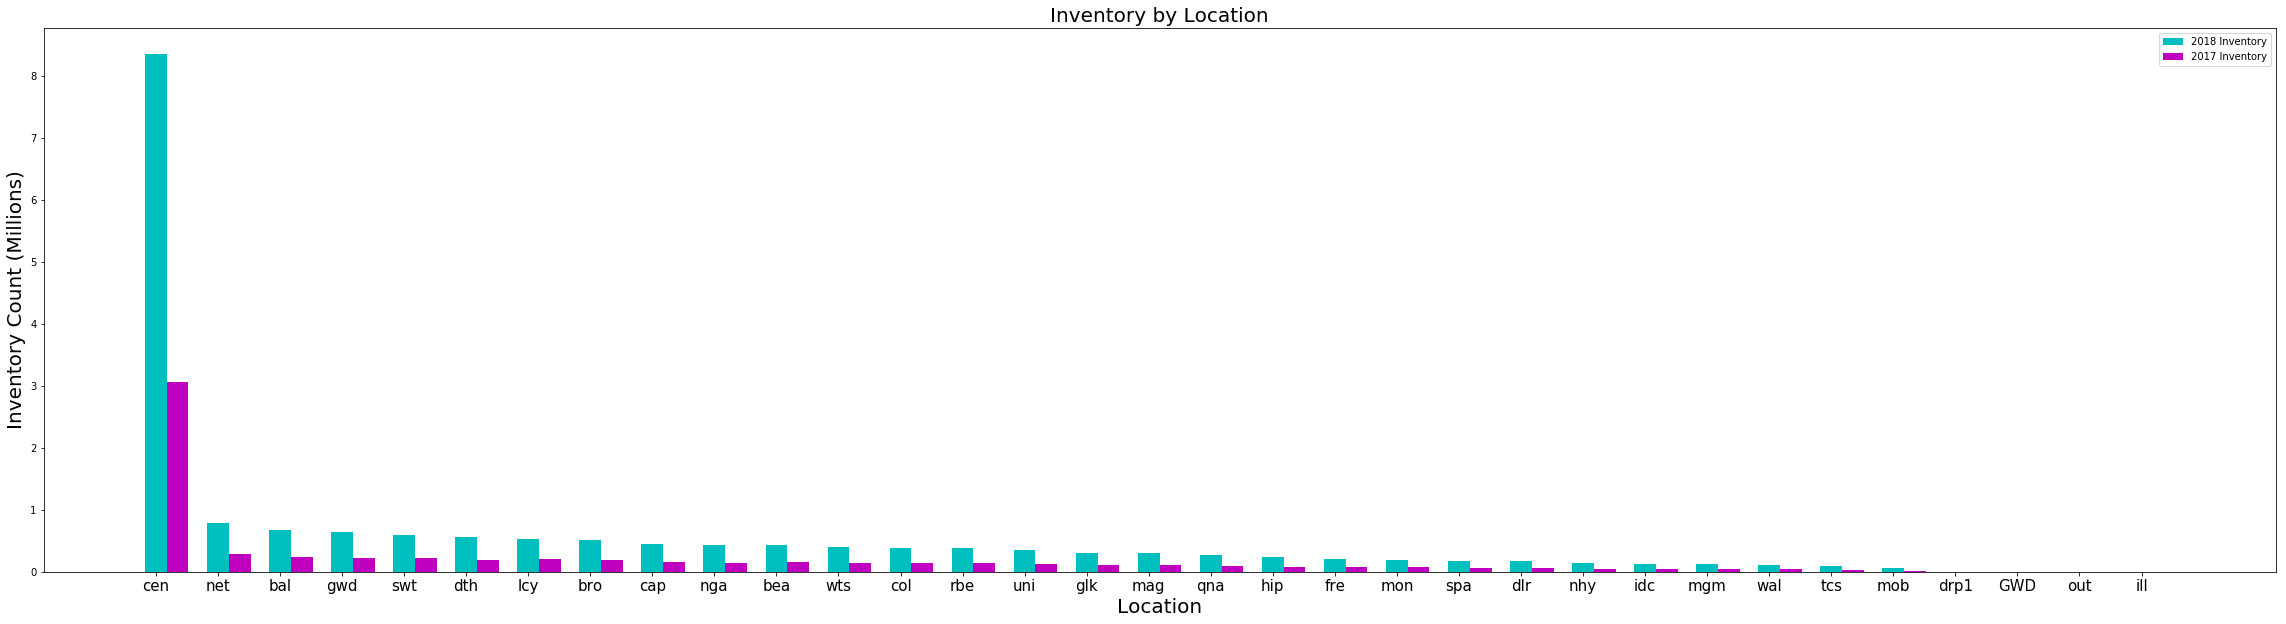

In [65]:
# create plot aggrigated by year

fig, ax = plt.subplots(figsize=(40, 10))
ind = np.arange(0, 33, 1)
width = .35
                                
count_2017 = inventory_by_location_by_year[["ItemLocation", "2017_ItemCount"]]
count_2018 = inventory_by_location_by_year[["ItemLocation", "2018_ItemCount"]]
 
rects1 = plt.bar(ind, count_2018["2018_ItemCount"], width, color='c', label='2018 Inventory')

rects2 = plt.bar(ind + width, count_2017["2017_ItemCount"], width, color='m', label='2017 Inventory')

# this is a function to create my y-axis tick marks in groups of 1,000,000.
def checkout_ticks(count, ticks):
    value = count / 1000000
    return int(value)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))
 
plt.xlabel('Location', fontsize = 20)
plt.ylabel('Inventory Count (Millions)', fontsize = 20)
plt.title('Inventory by Location', fontsize = 20)

ax.set_xticks(ind)
ax.set_xticklabels((inventory_by_location_by_year["ItemLocation"]), fontsize = 15)

plt.legend()

plt.savefig('inventory_by_location.png', bbox_inches='tight')

Something to remember is that this data only starts in Sept 2017. Therefore the inventory counts are only for 4 months, where 2018 has more months collected. This data is not averaged by month collected, therefore is a little misleading in that one could assume the inventory increase drastically in 2018. However, that might not be the case. more data for 2017 would be needed. 

One thing you can draw from this chart is that the Centeral branch (cen) has the highest invetory each year, and that the order of locations with the highest inventory doesn't change from 2017 to 2018.

An additonal step for further investigation would be to normalize the inventory by the number of months collected. 

#### Total Inventory by Location Over Time
I now want to see if there are any trends at a lower level than the yearly inventory totals. To do this, I will create a line plot.

First i need to create the inventory by location, and plot these.

In [66]:
# inventory by location
cen = inventory_by_location[inventory_by_location.ItemLocation == 'cen'].sort_values(by = "ReportDate", ascending = True)
net = inventory_by_location[inventory_by_location.ItemLocation == 'net'].sort_values(by = "ReportDate", ascending = True)
bal = inventory_by_location[inventory_by_location.ItemLocation == 'bal'].sort_values(by = "ReportDate", ascending = True)
gwd = inventory_by_location[inventory_by_location.ItemLocation == 'gwd'].sort_values(by = "ReportDate", ascending = True)
swt = inventory_by_location[inventory_by_location.ItemLocation == 'swt'].sort_values(by = "ReportDate", ascending = True)
dth = inventory_by_location[inventory_by_location.ItemLocation == 'dth'].sort_values(by = "ReportDate", ascending = True)
lcy = inventory_by_location[inventory_by_location.ItemLocation == 'lcy'].sort_values(by = "ReportDate", ascending = True)
bro = inventory_by_location[inventory_by_location.ItemLocation == 'bro'].sort_values(by = "ReportDate", ascending = True)
cap = inventory_by_location[inventory_by_location.ItemLocation == 'cap'].sort_values(by = "ReportDate", ascending = True)
nga = inventory_by_location[inventory_by_location.ItemLocation == 'nga'].sort_values(by = "ReportDate", ascending = True)
bea = inventory_by_location[inventory_by_location.ItemLocation == 'bea'].sort_values(by = "ReportDate", ascending = True)
wts = inventory_by_location[inventory_by_location.ItemLocation == 'wts'].sort_values(by = "ReportDate", ascending = True)
col = inventory_by_location[inventory_by_location.ItemLocation == 'col'].sort_values(by = "ReportDate", ascending = True)
rbe = inventory_by_location[inventory_by_location.ItemLocation == 'rbe'].sort_values(by = "ReportDate", ascending = True)
uni = inventory_by_location[inventory_by_location.ItemLocation == 'uni'].sort_values(by = "ReportDate", ascending = True)
gik = inventory_by_location[inventory_by_location.ItemLocation == 'gik'].sort_values(by = "ReportDate", ascending = True)
mag = inventory_by_location[inventory_by_location.ItemLocation == 'mag'].sort_values(by = "ReportDate", ascending = True)
qna = inventory_by_location[inventory_by_location.ItemLocation == 'qna'].sort_values(by = "ReportDate", ascending = True)
hip = inventory_by_location[inventory_by_location.ItemLocation == 'hip'].sort_values(by = "ReportDate", ascending = True)
fre = inventory_by_location[inventory_by_location.ItemLocation == 'fre'].sort_values(by = "ReportDate", ascending = True)
mon = inventory_by_location[inventory_by_location.ItemLocation == 'mon'].sort_values(by = "ReportDate", ascending = True)
spa = inventory_by_location[inventory_by_location.ItemLocation == 'spa'].sort_values(by = "ReportDate", ascending = True)
dir1 = inventory_by_location[inventory_by_location.ItemLocation == 'dir'].sort_values(by = "ReportDate", ascending = True)
nhy = inventory_by_location[inventory_by_location.ItemLocation == 'nhy'].sort_values(by = "ReportDate", ascending = True)
idc = inventory_by_location[inventory_by_location.ItemLocation == 'idc'].sort_values(by = "ReportDate", ascending = True)
mgm = inventory_by_location[inventory_by_location.ItemLocation == 'mgm'].sort_values(by = "ReportDate", ascending = True)
wal = inventory_by_location[inventory_by_location.ItemLocation == 'wal'].sort_values(by = "ReportDate", ascending = True)
tcs = inventory_by_location[inventory_by_location.ItemLocation == 'tcs'].sort_values(by = "ReportDate", ascending = True)
mob = inventory_by_location[inventory_by_location.ItemLocation == 'mob'].sort_values(by = "ReportDate", ascending = True)
drp1 = inventory_by_location[inventory_by_location.ItemLocation == 'drp1'].sort_values(by = "ReportDate", ascending = True)
GWD = inventory_by_location[inventory_by_location.ItemLocation == 'GWD'].sort_values(by = "ReportDate", ascending = True)
Out = inventory_by_location[inventory_by_location.ItemLocation == 'out'].sort_values(by = "ReportDate", ascending = True)
ill = inventory_by_location[inventory_by_location.ItemLocation == 'ill'].sort_values(by = "ReportDate", ascending = True)

#### Inventory by Location Over Time (all locations)

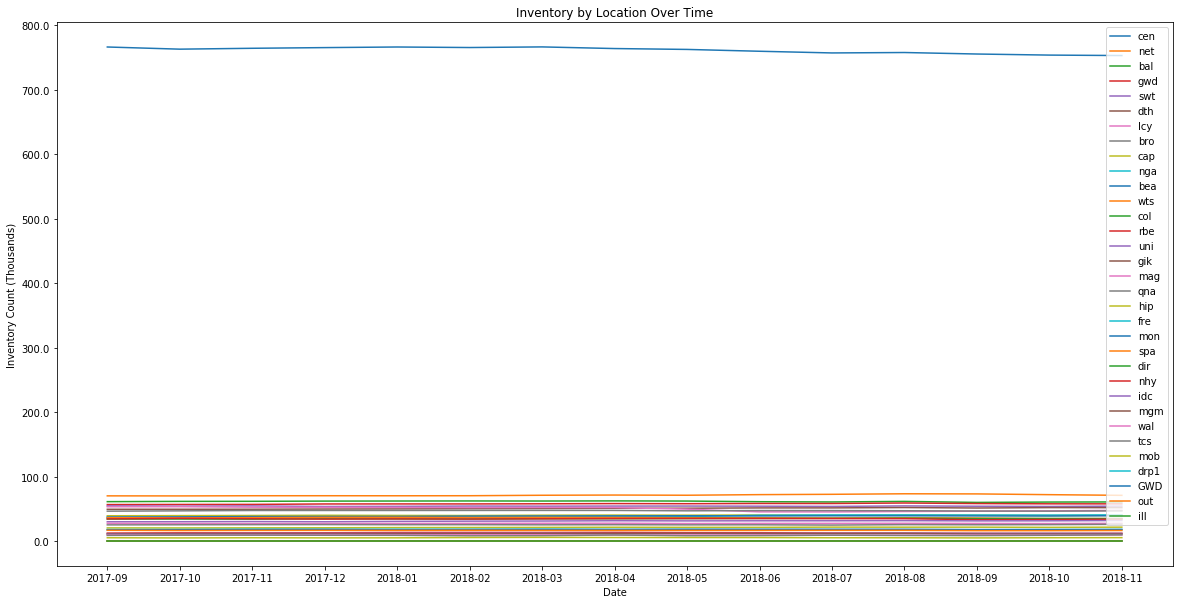

In [68]:
# Inventory by location over time

fig, ax = plt.subplots(figsize = (20, 10))
ind = np.arange(0, 15 , 1)


list1 = cen["ItemCount"].tolist()
list2 = net["ItemCount"].tolist()
list3 = bal["ItemCount"].tolist()
list4 = gwd["ItemCount"].tolist()
list5 = swt["ItemCount"].tolist()
list6 = dth["ItemCount"].tolist()
list7 = lcy["ItemCount"].tolist()
list8 = bro["ItemCount"].tolist()
list9 = cap["ItemCount"].tolist()
list10 = nga["ItemCount"].tolist()
list11 = bea["ItemCount"].tolist()
list12 = wts["ItemCount"].tolist()
list13 = col["ItemCount"].tolist()
list14 = rbe["ItemCount"].tolist()
list15 = uni["ItemCount"].tolist()
list16 = gik["ItemCount"].tolist()
list17 = mag["ItemCount"].tolist()
list18 = qna["ItemCount"].tolist()
list19 = hip["ItemCount"].tolist()
list20 = fre["ItemCount"].tolist()
list21 = mon["ItemCount"].tolist()
list22 = spa["ItemCount"].tolist()
list23 = dir1["ItemCount"].tolist()
list24 = nhy["ItemCount"].tolist()
list25 = idc["ItemCount"].tolist()
list26 = mgm["ItemCount"].tolist()
list27 = wal["ItemCount"].tolist()
list28 = tcs["ItemCount"].tolist()
list29 = mob["ItemCount"].tolist()
list30 = drp1["ItemCount"].tolist()
list31 = GWD["ItemCount"].tolist()
list32 = Out["ItemCount"].tolist()
list33 = ill["ItemCount"].tolist()

line1 =plt.plot(list1,label = 'cen')
line2=plt.plot(list2,label = 'net')
line3=plt.plot(list3,label = 'bal')
line4=plt.plot(list4,label = 'gwd')
line5=plt.plot(list5,label = 'swt')
line6=plt.plot(list6,label = 'dth')
line7=plt.plot(list7,label = 'lcy')
line8=plt.plot(list8,label = 'bro')
line9=plt.plot(list9,label = 'cap')
line10=plt.plot(list10,label = 'nga')
line11=plt.plot(list11,label = 'bea')
line12=plt.plot(list12,label = 'wts')
line13=plt.plot(list13,label = 'col')
line14=plt.plot(list14,label = 'rbe')
line15=plt.plot(list15,label = 'uni')
line16=plt.plot(list16,label = 'gik')
line17=plt.plot(list17,label = 'mag')
line18=plt.plot(list18,label = 'qna')
line19=plt.plot(list19,label = 'hip')
line20=plt.plot(list20,label = 'fre')
line21=plt.plot(list21,label = 'mon')
line22=plt.plot(list22,label = 'spa')
line23=plt.plot(list23,label = 'dir')
line24=plt.plot(list24,label = 'nhy')
line25=plt.plot(list25,label = 'idc')
line26=plt.plot(list26,label = 'mgm')
line27=plt.plot(list27,label = 'wal')
line28=plt.plot(list28,label = 'tcs')
line29=plt.plot(list29,label = 'mob')
line30=plt.plot(list30,label = 'drp1')
line31=plt.plot(list31,label = 'GWD')
line32=plt.plot(list32,label = 'out')
line33=plt.plot(list33,label = 'ill')


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

#create a list of lables for plot
cen['month_year'] = cen.ReportDate.dt.to_period('M')

# set x ticks
ax.set_xticks(ind)
ax.set_xticklabels((cen['month_year']))


plt.xlabel('Date')
plt.ylabel('Inventory Count (Thousands)')
plt.title('Inventory by Location Over Time')

plt.legend()

plt.savefig('inventory_by_location_over_time.png', bbox_inches='tight')

This plot isn't very useful becuase the Central Branch has such a higher inventory over the other branches. Therefore my next set of graphs seperates the Centeral Branch.

#### Inventory by Location Over Time (Centeral Only)

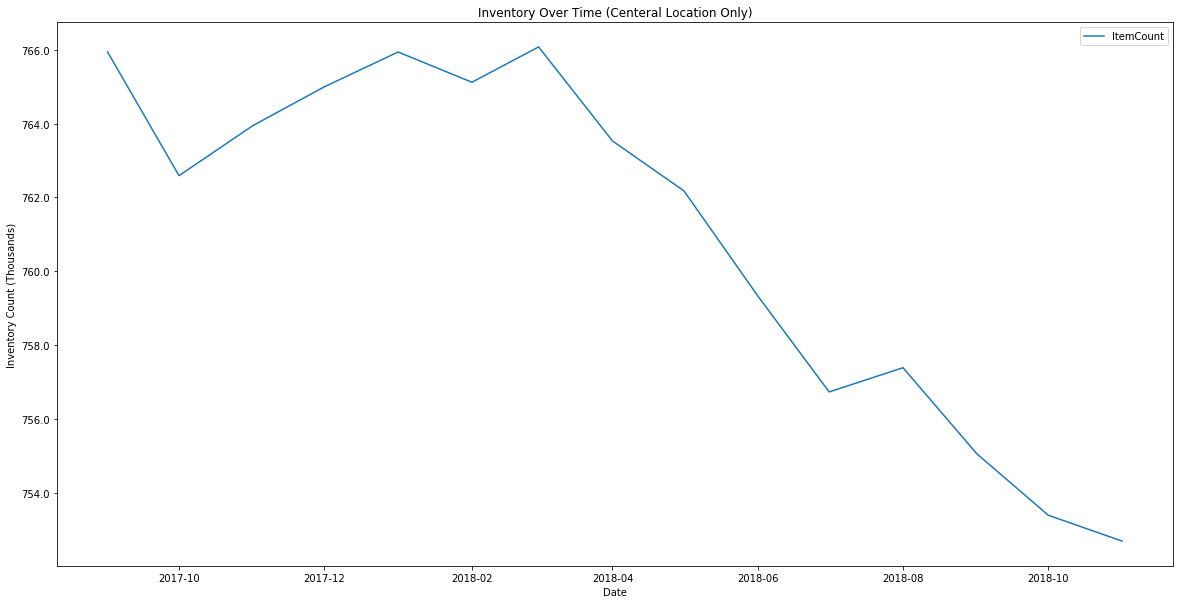

In [69]:
# Inventory by location over time for cen

fig, ax = plt.subplots(figsize = (20, 10))
ind = np.arange(0, 15 , 1)

list1 = cen["ItemCount"]

line1 =plt.plot(cen["ReportDate"], cen["ItemCount"])

# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return value

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

plt.xlabel('Date')
plt.ylabel('Inventory Count (Thousands)')
plt.title('Inventory Over Time (Centeral Location Only)')

plt.legend()
plt.savefig('inventory_by_location_over_time_cen_only.png', bbox_inches='tight')


#### Inventory by Location Over Time (Excluding Centeral)

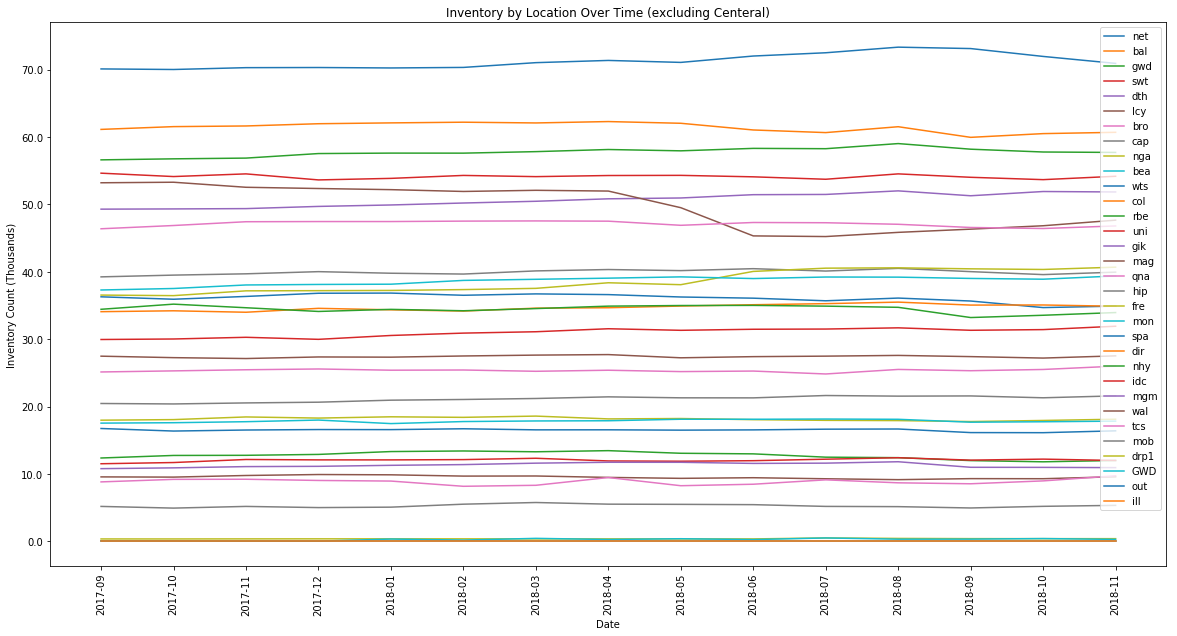

In [70]:
# Inventory by location over time excluing Centeral

fig, ax = plt.subplots(figsize = (20, 10))
ind = np.arange(0, 15 , 1)

list2 = net["ItemCount"].tolist()
list3 = bal["ItemCount"].tolist()
list4 = gwd["ItemCount"].tolist()
list5 = swt["ItemCount"].tolist()
list6 = dth["ItemCount"].tolist()
list7 = lcy["ItemCount"].tolist()
list8 = bro["ItemCount"].tolist()
list9 = cap["ItemCount"].tolist()
list10 = nga["ItemCount"].tolist()
list11 = bea["ItemCount"].tolist()
list12 = wts["ItemCount"].tolist()
list13 = col["ItemCount"].tolist()
list14 = rbe["ItemCount"].tolist()
list15 = uni["ItemCount"].tolist()
list16 = gik["ItemCount"].tolist()
list17 = mag["ItemCount"].tolist()
list18 = qna["ItemCount"].tolist()
list19 = hip["ItemCount"].tolist()
list20 = fre["ItemCount"].tolist()
list21 = mon["ItemCount"].tolist()
list22 = spa["ItemCount"].tolist()
list23 = dir1["ItemCount"].tolist()
list24 = nhy["ItemCount"].tolist()
list25 = idc["ItemCount"].tolist()
list26 = mgm["ItemCount"].tolist()
list27 = wal["ItemCount"].tolist()
list28 = tcs["ItemCount"].tolist()
list29 = mob["ItemCount"].tolist()
list30 = drp1["ItemCount"].tolist()
list31 = GWD["ItemCount"].tolist()
list32 = Out["ItemCount"].tolist()
list33 = ill["ItemCount"].tolist()


line2=plt.plot(list2,label = 'net')
line3=plt.plot(list3,label = 'bal')
line4=plt.plot(list4,label = 'gwd')
line5=plt.plot(list5,label = 'swt')
line6=plt.plot(list6,label = 'dth')
line7=plt.plot(list7,label = 'lcy')
line8=plt.plot(list8,label = 'bro')
line9=plt.plot(list9,label = 'cap')
line10=plt.plot(list10,label = 'nga')
line11=plt.plot(list11,label = 'bea')
line12=plt.plot(list12,label = 'wts')
line13=plt.plot(list13,label = 'col')
line14=plt.plot(list14,label = 'rbe')
line15=plt.plot(list15,label = 'uni')
line16=plt.plot(list16,label = 'gik')
line17=plt.plot(list17,label = 'mag')
line18=plt.plot(list18,label = 'qna')
line19=plt.plot(list19,label = 'hip')
line20=plt.plot(list20,label = 'fre')
line21=plt.plot(list21,label = 'mon')
line22=plt.plot(list22,label = 'spa')
line23=plt.plot(list23,label = 'dir')
line24=plt.plot(list24,label = 'nhy')
line25=plt.plot(list25,label = 'idc')
line26=plt.plot(list26,label = 'mgm')
line27=plt.plot(list27,label = 'wal')
line28=plt.plot(list28,label = 'tcs')
line29=plt.plot(list29,label = 'mob')
line30=plt.plot(list30,label = 'drp1')
line31=plt.plot(list31,label = 'GWD')
line32=plt.plot(list32,label = 'out')
line33=plt.plot(list33,label = 'ill')


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

#create a list of lables for plot
cen['month_year'] = cen.ReportDate.dt.to_period('M')

# set x ticks
ax.set_xticks(ind)
ax.set_xticklabels((cen['month_year']),rotation='vertical')

plt.xlabel('Date')
plt.ylabel('Inventory Count (Thousands)')
plt.title('Inventory by Location Over Time (excluding Centeral)')

plt.legend()

plt.savefig('inventory_by_location_over_time_no_centeral.png', bbox_inches='tight')

From the two charts above, you can see most of locations don't have much change in Inventory when you take into concideration the scale of the y-axi is in Thousands of titles. However the Centeral Location changes drastically, and Lake City also noticably changes (lcy). To see this a little better my next plot isolates the top ten locations from the chart above. 

#### Inventory by Location Over Time (Top 10 excluding Centeral)

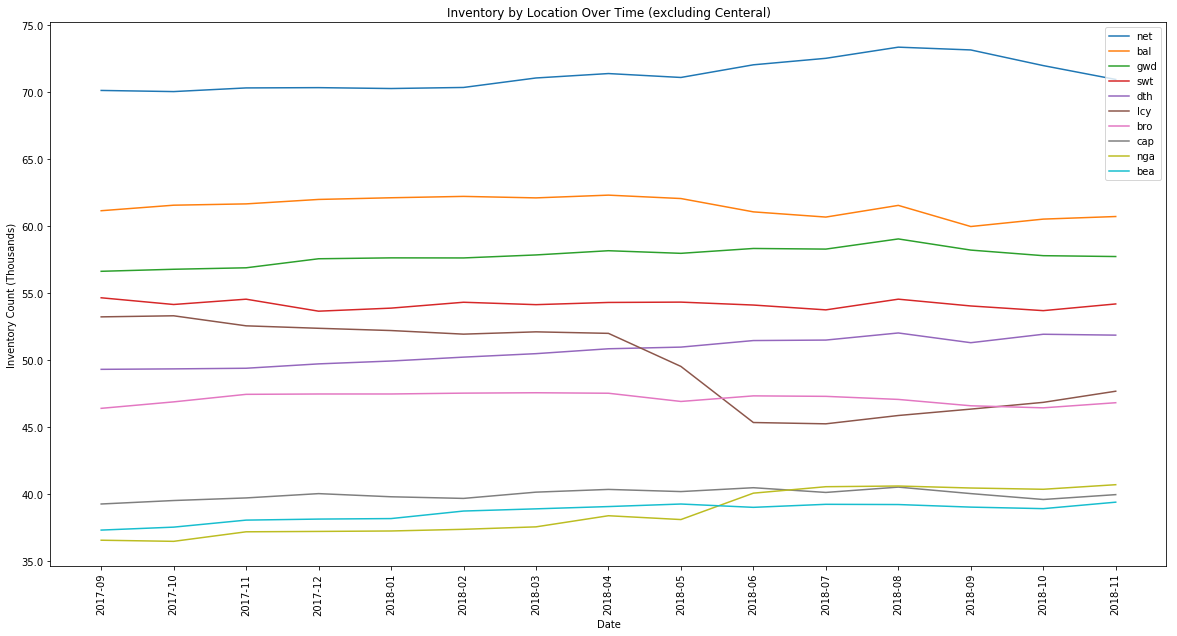

In [71]:
# Inventory by location over time for locations with the top 10 highets inventory, excluing Centeral

fig, ax = plt.subplots(figsize = (20, 10))
ind = np.arange(0, 15 , 1)

list2 = net["ItemCount"].tolist()
list3 = bal["ItemCount"].tolist()
list4 = gwd["ItemCount"].tolist()
list5 = swt["ItemCount"].tolist()
list6 = dth["ItemCount"].tolist()
list7 = lcy["ItemCount"].tolist()
list8 = bro["ItemCount"].tolist()
list9 = cap["ItemCount"].tolist()
list10 = nga["ItemCount"].tolist()
list11 = bea["ItemCount"].tolist()

line2=plt.plot(list2,label = 'net')
line3=plt.plot(list3,label = 'bal')
line4=plt.plot(list4,label = 'gwd')
line5=plt.plot(list5,label = 'swt')
line6=plt.plot(list6,label = 'dth')
line7=plt.plot(list7,label = 'lcy')
line8=plt.plot(list8,label = 'bro')
line9=plt.plot(list9,label = 'cap')
line10=plt.plot(list10,label = 'nga')
line11=plt.plot(list11,label = 'bea')


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

#create a list of lables for plot
cen['month_year'] = cen.ReportDate.dt.to_period('M')

# set x ticks
ax.set_xticks(ind)
ax.set_xticklabels((cen['month_year']),rotation='vertical')

plt.xlabel('Date')
plt.ylabel('Inventory Count (Thousands)')
plt.title('Inventory by Location Over Time (excluding Centeral)')

plt.legend()

plt.savefig('top_10_inventory_by_location_over_time_no_centeral.png', bbox_inches='tight')

This chart shows the change in the Lake City inventory branch in much more detail, and the slight changes over time of the other branches. 

### Research Question 2 (revisited): Is there a correlation between library location and physical material checkout numbers over time?
Now that I have an understanding of the inventory by year, I will answer this question. I will merge the checkouts by title data and the inventory library collection data for the months that they have in common. This will allow me to see the checkout data (from checkouts by title) and the location data (from library collection inventory).  I will use my smaller dataset of *checkouts_2017* and *checkouts_2018* because those are the years the larger two datasets have in common.

In [72]:
checkouts_2017.head(2) # just a reminder of the data I am using

,UsageClass,CheckoutType,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Title,Creator,Subjects,Publisher,PublicationYear,year,month,day,report_date
26444313,Digital,Hoopla,MOVIE,2017,1,2,Hideous Kinky,NaN,Drama,"Samuel Goldwyn Films, LLC",NaN,2017,1,1,2017-01-01
26444430,Digital,Freegal,SONG,2017,1,4,Have Yourself a Merry Little Christmas,Kelly Clarkson,NaN,NaN,NaN,2017,1,1,2017-01-01


I will first seperate inventory by year so I can perform my joins to the checkout data. To do this, I will add in a "year" column to the library inventory data.

In [73]:
# Add in a year column to split the dataset by year.
library_collection_inventory["year"] = pd.DatetimeIndex(library_collection_inventory["ReportDate"]).year

library_collection_inventory.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount,year
0,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,Floating,wts,10/01/2017,1,2017
1,2599591,On the Edge/ Illona Andrews.,"Andrews, Ilona","0441017800, 9780441017805",c2009.,"Ace Books,",Fantasy fiction,acbk,nasf,NaN,bea,10/01/2017,1,2017
2,2737188,Columbus : the four voyages / Laurence Bergreen.,"Bergreen, Laurence","1410441156, 9781410441157",2011.,"Thorndike Press,","Columbus Christopher Travel America, America D...",acbk,nalpnf,Floating,lcy,10/01/2017,1,2017
3,2737711,"Hanukkah, oh Hanukkah / illustrated by Olga an...",NaN,"076145845X, 9780761458456",2011.,"Marshall Cavendish Children,","Childrens songs Texts Juvenile fiction, Hanukk...",jcbk,nchol,NaN,qna,10/01/2017,1,2017
4,3081757,"Selected ambient works, 85-92 [sound recording...",Aphex Twin,NaN,[201-?],"Apollo Records,","Popular music 1981 1990, Popular music 1991 20...",accd,nacd,Floating,hip,10/01/2017,1,2017


Next i will sepreate the invetory data by year and save that subset for potential later use.

In [74]:
#Create inveotory data for 2018
library_collection_inventory_2018 = library_collection_inventory[library_collection_inventory.year == 2018]
library_collection_inventory_2018.to_csv("library_collection_inventory_2018.csv")

#Create inveotory data for 2017
library_collection_inventory_2017 = library_collection_inventory[library_collection_inventory.year == 2017]
library_collection_inventory_2017.to_csv("library_collection_inventory_2017.csv")

Now I will add a month column from the report date to each subset of inventory data, and save that dataset.

In [75]:
library_collection_inventory_2018["month"] = pd.DatetimeIndex(library_collection_inventory_2018["ReportDate"]).month
library_collection_inventory_2017["month"] = pd.DatetimeIndex(library_collection_inventory_2017["ReportDate"]).month

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
library_collection_inventory_2017.to_csv("library_collection_inventory_2017_with_month.csv")
library_collection_inventory_2018.to_csv("library_collection_inventory_2018_with_month.csv")

In [77]:
library_collection_inventory_2017.head(2) # to see what the table looks like now...

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount,year,month
0,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,Floating,wts,10/01/2017,1,2017,10
1,2599591,On the Edge/ Illona Andrews.,"Andrews, Ilona","0441017800, 9780441017805",c2009.,"Ace Books,",Fantasy fiction,acbk,nasf,NaN,bea,10/01/2017,1,2017,10


I now have my datasets. I need to merge them in order to have the checkout counts by month and the locations. I will do this for 2017 and 2018, and save the datasets

In [79]:
checkouts_by_location_2017 = pd.merge(library_collection_inventory_2017, checkouts_2017, how = "inner",
                                 on = ["Title", "year", "month"])
checkouts_by_location_2017.to_csv('checkouts_by_location_2017.csv')

In [80]:
checkouts_by_location_2018 = pd.merge(library_collection_inventory_2018, checkouts_2018, how = "inner",
                                 on = ["Title", "year", "month"])
checkouts_by_location_2018.to_csv('checkouts_by_location_2018.csv')

In [81]:
checkouts_by_location_2017.head(3)

,BibNum,Title,Author,ISBN,PublicationYear_x,Publisher_x,Subjects_x,ItemType,ItemCollection,FloatingItem,...,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Creator,Subjects_y,Publisher_y,PublicationYear_y,day,report_date
0,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,Floating,...,VIDEODISC,2017,10,2,NaN,"High school students Drama, Volleyball players...","Sentai Filmworks,",[2015],1,2017-10-01
1,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,Floating,...,VIDEODISC,2017,10,2,NaN,"High school students Drama, Volleyball players...","Sentai Filmworks,",[2015],1,2017-10-01
2,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,calndvd,NaN,...,VIDEODISC,2017,10,2,NaN,"High school students Drama, Volleyball players...","Sentai Filmworks,",[2015],1,2017-10-01


In [82]:
checkouts_by_location_2018.head(3)

,BibNum,Title,Author,ISBN,PublicationYear_x,Publisher_x,Subjects_x,ItemType,ItemCollection,FloatingItem,...,MaterialType,CheckoutYear,CheckoutMonth,Checkouts,Creator,Subjects_y,Publisher_y,PublicationYear_y,day,report_date
0,3177276,Day of the Dead.,NaN,NaN,[2016],"Red Hot/4AD,","Rock music 2011 2020, Rock music",accd,naover,NaN,...,SOUNDDISC,2018,1,12,NaN,"Rock music 2011 2020, Rock music","Red Hot/4AD,",[2016],1,2018-01-01
1,3177276,Day of the Dead.,NaN,NaN,[2016],"Red Hot/4AD,","Rock music 2011 2020, Rock music",accd,naover,NaN,...,SOUNDDISC,2018,1,12,NaN,"Rock music 2011 2020, Rock music","Red Hot/4AD,",[2016],1,2018-01-01
2,3177276,Day of the Dead.,NaN,NaN,[2016],"Red Hot/4AD,","Rock music 2011 2020, Rock music",accd,naover,NaN,...,SOUNDDISC,2018,1,12,NaN,"Rock music 2011 2020, Rock music","Red Hot/4AD,",[2016],1,2018-01-01


Now that I have the merged datasets, I need to group them by the location, month and UsageClass so I can make some summary tables and plots. 

In [83]:
# create subsets to to speed up calculations....
# subset for checkouts
temp = checkouts_by_location_2017.groupby(["ItemLocation", "month", "UsageClass"],
                                          as_index=False)[["Checkouts"]].sum()
temp2 = checkouts_by_location_2018.groupby(["ItemLocation", "month", "UsageClass"],
                                          as_index=False)[["Checkouts"]].sum()

In [84]:
# subsets for inventory counts
temp3 = checkouts_by_location_2017.groupby(["ItemLocation", "month", "UsageClass"],
                                          as_index=False)[["ItemCount"]].sum()
temp4 = checkouts_by_location_2018.groupby(["ItemLocation", "month", "UsageClass"],
                                          as_index=False)[["ItemCount"]].sum()

In [85]:
# Seperate out the physical and digital checkouts
physical_checkouts_by_location_2017 = temp[temp.UsageClass == "Physical"]
digital_checkouts_by_location_2017 = temp[temp.UsageClass == "Digital"]

physical_checkouts_by_location_2018 = temp2[temp2.UsageClass == "Physical"]
digital_checkouts_by_location_2018 = temp2[temp2.UsageClass == "Digital"]

In [86]:
# Seperate out the physical and digital inventory counts
physical_inventory_count_by_location_2017 = temp3[temp3.UsageClass == "Physical"]
digital_inventory_count_by_location_2017 = temp3[temp3.UsageClass == "Digital"]

physical_inventory_count_by_location_2018 = temp4[temp4.UsageClass == "Physical"]
digital_inventory_count_by_location_2018 = temp4[temp4.UsageClass == "Digital"]

In [87]:
# group checkout data subset by checkouts by month. 
physical_checkouts_by_month_2017 = physical_checkouts_by_location_2017.groupby("month",as_index = False)[["Checkouts"]].sum()
digital_checkouts_by_month_2017 = digital_checkouts_by_location_2017.groupby("month", as_index = False)[["Checkouts"]].sum()

physical_checkouts_by_month_2018 = physical_checkouts_by_location_2018.groupby("month",as_index = False)[["Checkouts"]].sum()
digital_checkouts_by_month_2018 = digital_checkouts_by_location_2018.groupby("month", as_index = False)[["Checkouts"]].sum()


In [88]:
# group inventory data subset by checkouts by month. 
physical_inventory_count_by_month_2017 = physical_inventory_count_by_location_2017.groupby("month",as_index = False)[["ItemCount"]].sum()
digital_inventory_count_by_month_2017 = digital_inventory_count_by_location_2017.groupby("month", as_index = False)[["ItemCount"]].sum()

physical_inventory_count_by_month_2018 = physical_inventory_count_by_location_2018.groupby("month",as_index = False)[["ItemCount"]].sum()
digital_inventory_count_by_month_2018 = digital_inventory_count_by_location_2018.groupby("month", as_index = False)[["ItemCount"]].sum()


Now that I have the datasets, I want to merge the tables by month for each of the years and datatypes. This was I can see if there are any major differences in physical checkouts by location vs digital checkouts by location. I'll first perform this for the checkouts, then the Inventory Items.

In [89]:
# Checkouts for 2017
checkouts_by_months_2017 = pd.merge(physical_checkouts_by_month_2017, digital_checkouts_by_month_2017, how = "outer", on="month")
checkouts_by_months_2017.head()

,month,Checkouts_x,Checkouts_y
0,9,5618564,127
1,10,5809786,129
2,11,4977730,81
3,12,6317519,53


In [90]:
# Rename the column titles....
checkouts_by_months_2017 = checkouts_by_months_2017.rename(columns = {"Checkouts_x": "Physical_Checkouts_2017", "Checkouts_y": "Digital_Checkouts_2017"})
checkouts_by_months_2017.head()

,month,Physical_Checkouts_2017,Digital_Checkouts_2017
0,9,5618564,127
1,10,5809786,129
2,11,4977730,81
3,12,6317519,53


In [91]:
# Checkouts for 2018
checkouts_by_months_2018 = pd.merge(physical_checkouts_by_month_2018, digital_checkouts_by_month_2018, how = "outer", on="month")
checkouts_by_months_2018.head()

,month,Checkouts_x,Checkouts_y
0,1,6745738,118
1,2,5858091,132
2,3,6482165,107
3,4,6428074,62
4,5,6055022,25


In [92]:
# Rename the column titles....
checkouts_by_months_2018 = checkouts_by_months_2018.rename(columns = {"Checkouts_x": "Physical_Checkouts_2018", "Checkouts_y": "Digital_Checkouts_2018"})
checkouts_by_months_2018.head()

,month,Physical_Checkouts_2018,Digital_Checkouts_2018
0,1,6745738,118
1,2,5858091,132
2,3,6482165,107
3,4,6428074,62
4,5,6055022,25


In [93]:
# merge 2017 and 2018
checkouts_by_months = pd.merge(checkouts_by_months_2017, checkouts_by_months_2018, how = "outer", on = "month")

In [94]:
# Sort data by month.
checkouts_by_months = checkouts_by_months.sort_values(by = "month", ascending = True).fillna(0).astype(int)

Now to repeat this for the inventory data.

In [95]:
# Inventory for 2017
inventory_count_by_months_2017 = pd.merge(physical_inventory_count_by_month_2017, digital_inventory_count_by_month_2017, how = "outer", on="month")
inventory_count_by_months_2017.head(3)

,month,ItemCount_x,ItemCount_y
0,9,894194,25
1,10,899470,28
2,11,743326,23


In [96]:
# Rename the column titles....
inventory_count_by_months_2017 = inventory_count_by_months_2017.rename(columns = {"ItemCount_x": "Physical_ItemCount_2017", "ItemCount_y": "Digital_ItemCount_2017"})

In [97]:
# Inventory for 2018
inventory_count_by_months_2018 = pd.merge(physical_inventory_count_by_month_2018, digital_inventory_count_by_month_2018, how = "outer", on="month")

# Rename the column titles....
inventory_count_by_months_2018 = inventory_count_by_months_2018.rename(columns = {"ItemCount_x": "Physical_ItemCount_2018", "ItemCount_y": "Digital_ItemCount_2018"})

In [98]:
# merge 2017 and 2018
inventory_count_by_months = pd.merge(inventory_count_by_months_2017, inventory_count_by_months_2018, how = "outer", on = "month")

inventory_count_by_months = inventory_count_by_months.sort_values(by = "month", ascending = True).fillna(0).astype(int)

#### Digital and Phyiscal Checkouts

In [99]:
checkouts_by_months

,month,Physical_Checkouts_2017,Digital_Checkouts_2017,Physical_Checkouts_2018,Digital_Checkouts_2018
4,1,0,0,6745738,118
5,2,0,0,5858091,132
6,3,0,0,6482165,107
7,4,0,0,6428074,62
8,5,0,0,6055022,25
9,6,0,0,6575624,5
10,7,0,0,6663354,11
11,8,0,0,6738920,6
0,9,5618564,127,5902802,6
1,10,5809786,129,6168668,4


#### Digital and Physial Inventory

In [100]:
inventory_count_by_months

,month,Physical_ItemCount_2017,Digital_ItemCount_2017,Physical_ItemCount_2018,Digital_ItemCount_2018
4,1,0,0,952805,20
5,2,0,0,926412,31
6,3,0,0,945828,13
7,4,0,0,941810,26
8,5,0,0,920845,12
9,6,0,0,939016,6
10,7,0,0,941534,8
11,8,0,0,950146,8
0,9,894194,25,916516,8
1,10,899470,28,919504,1


As you can see there are significantly more checkouts by month for the digital items. I wanted to verify that this was still following the same trend from the previous research quesiton about digital versus physical checkouts over time.

You can also see from these tables that the inventory for digital items is much less than the physical inventory. This could be a factor in the small number of digital checkouts.

Now that I understand this, I need to create my visualzations. To do this, I need to create some more datasubsets by month for the physical checkouts.

In [101]:
# create checkouts of physical items by location by month

physical_checkouts_by_location_2017_sep = physical_checkouts_by_location_2017[physical_checkouts_by_location_2017.month == 9]
physical_checkouts_by_location_2017_oct = physical_checkouts_by_location_2017[physical_checkouts_by_location_2017.month == 10]
physical_checkouts_by_location_2017_nov = physical_checkouts_by_location_2017[physical_checkouts_by_location_2017.month == 11]
physical_checkouts_by_location_2017_dec = physical_checkouts_by_location_2017[physical_checkouts_by_location_2017.month == 12]

physical_checkouts_by_location_2018_jan = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 1]
physical_checkouts_by_location_2018_feb = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 2]
physical_checkouts_by_location_2018_mar = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 3]
physical_checkouts_by_location_2018_apr = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 4]
physical_checkouts_by_location_2018_may = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 5]
physical_checkouts_by_location_2018_jun = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 6]
physical_checkouts_by_location_2018_jul = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 7]
physical_checkouts_by_location_2018_aug = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 8]
physical_checkouts_by_location_2018_sep = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 9]
physical_checkouts_by_location_2018_oct = physical_checkouts_by_location_2018[physical_checkouts_by_location_2018.month == 10]


I will show you the results for one subset of data then repeate it for all of the other months. 

In [102]:
# first i will rename the Checkouts column.
physical_checkouts_by_location_2017_sep = physical_checkouts_by_location_2017_sep.rename(columns = {"Checkouts": "Sep 2017"})
physical_checkouts_by_location_2017_sep.head(1)

,ItemLocation,month,UsageClass,Sep 2017
0,GWD,9,Physical,734


In [103]:
# Then I will drop the month and UsageClass columns.
# The month will be captured by Sep 2017 and the UsageClass is always physial

physical_checkouts_by_location_2017_sep = physical_checkouts_by_location_2017_sep.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2017_sep.head(1)

,ItemLocation,Sep 2017
0,GWD,734


In [104]:
# now for the other subsets....

physical_checkouts_by_location_2017_oct = physical_checkouts_by_location_2017_oct.rename(columns = {"Checkouts": "Oct 2017"})
physical_checkouts_by_location_2017_nov = physical_checkouts_by_location_2017_nov.rename(columns = {"Checkouts": "Nov 2017"})
physical_checkouts_by_location_2017_dec = physical_checkouts_by_location_2017_dec.rename(columns = {"Checkouts": "Dec 2017"})

physical_checkouts_by_location_2018_jan = physical_checkouts_by_location_2018_jan.rename(columns = {"Checkouts": "Jan 2018"})
physical_checkouts_by_location_2018_feb = physical_checkouts_by_location_2018_feb.rename(columns = {"Checkouts": "Feb 2018"})
physical_checkouts_by_location_2018_mar = physical_checkouts_by_location_2018_mar.rename(columns = {"Checkouts": "Mar 2018"})
physical_checkouts_by_location_2018_apr = physical_checkouts_by_location_2018_apr.rename(columns = {"Checkouts": "Apr 2018"})
physical_checkouts_by_location_2018_may = physical_checkouts_by_location_2018_may.rename(columns = {"Checkouts": "May 2018"})
physical_checkouts_by_location_2018_jun = physical_checkouts_by_location_2018_jun.rename(columns = {"Checkouts": "Jun 2018"})
physical_checkouts_by_location_2018_jul = physical_checkouts_by_location_2018_jul.rename(columns = {"Checkouts": "Jul 2018"})
physical_checkouts_by_location_2018_aug = physical_checkouts_by_location_2018_aug.rename(columns = {"Checkouts": "Aug 2018"})
physical_checkouts_by_location_2018_sep = physical_checkouts_by_location_2018_sep.rename(columns = {"Checkouts": "Sep 2018"})
physical_checkouts_by_location_2018_oct = physical_checkouts_by_location_2018_oct.rename(columns = {"Checkouts": "Oct 2018"})

In [105]:
physical_checkouts_by_location_2017_oct = physical_checkouts_by_location_2017_oct.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2017_nov = physical_checkouts_by_location_2017_nov.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2017_dec = physical_checkouts_by_location_2017_dec.drop(["month", "UsageClass"],
                                                                                       axis = 1)

physical_checkouts_by_location_2018_jan = physical_checkouts_by_location_2018_jan.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_feb = physical_checkouts_by_location_2018_feb.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_mar = physical_checkouts_by_location_2018_mar.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_apr = physical_checkouts_by_location_2018_apr.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_may = physical_checkouts_by_location_2018_may.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_jun = physical_checkouts_by_location_2018_jun.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_jul = physical_checkouts_by_location_2018_jul.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_aug = physical_checkouts_by_location_2018_aug.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_sep = physical_checkouts_by_location_2018_sep.drop(["month", "UsageClass"],
                                                                                       axis = 1)
physical_checkouts_by_location_2018_oct = physical_checkouts_by_location_2018_oct.drop(["month", "UsageClass"],
                                                                                       axis = 1)

Now I will merge the data on "ItemLoction". This way I can get all the counts by location.

In [106]:
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_location_2017_sep, physical_checkouts_by_location_2017_oct,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations.head()

,ItemLocation,Sep 2017,Oct 2017
0,GWD,734,575
1,bal,288960,302231
2,bea,210981,217943
3,bro,233921,241151
4,cap,231519,238356


In [107]:
# now for the rest of the data...

physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2017_nov,
                                          on = "ItemLocation", how = "outer")

In [108]:
physical_checkouts_by_locations.head()

,ItemLocation,Sep 2017,Oct 2017,Nov 2017
0,GWD,734,575,64
1,bal,288960,302231,256097
2,bea,210981,217943,189359
3,bro,233921,241151,199856
4,cap,231519,238356,191625


In [109]:
# Merge all the data into one large table...
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2017_dec,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_jan,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_feb,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_mar,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_apr,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_may,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_jun,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_jul,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_aug,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_sep,
                                          on = "ItemLocation", how = "outer")
physical_checkouts_by_locations = pd.merge(physical_checkouts_by_locations, physical_checkouts_by_location_2018_oct,
                                          on = "ItemLocation", how = "outer")

In [110]:
physical_checkouts_by_locations.head()

,ItemLocation,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018
0,GWD,734.0,575.0,64.0,115.0,4167.0,898.0,5459,2158.0,2663.0,1492.0,4153,1886.0,1784.0,2739.0
1,bal,288960.0,302231.0,256097.0,312392.0,335029.0,288862.0,315455,309987.0,293069.0,315056.0,321783,329434.0,286142.0,300173.0
2,bea,210981.0,217943.0,189359.0,231882.0,254300.0,225274.0,247835,244561.0,229311.0,248496.0,252584,254497.0,226644.0,237755.0
3,bro,233921.0,241151.0,199856.0,267586.0,280241.0,242123.0,267855,264711.0,248875.0,278837.0,280917,285754.0,249278.0,258426.0
4,cap,231519.0,238356.0,191625.0,251989.0,269878.0,229692.0,254123,250328.0,237430.0,258064.0,261232,266940.0,231717.0,243896.0


I will sort this table by the checkouts by location for september so that my Item Locaitons are llsted in the same order as my inventory tables.

In [111]:
physical_checkouts_by_locations = physical_checkouts_by_locations.sort_values(by= "Sep 2017", ascending = False).reset_index().drop("index", axis = 1)

In [112]:
physical_checkouts_by_locations.head()

,ItemLocation,Sep 2017,Oct 2017,Nov 2017,Dec 2017,Jan 2018,Feb 2018,Mar 2018,Apr 2018,May 2018,Jun 2018,Jul 2018,Aug 2018,Sep 2018,Oct 2018
0,cen,549758.0,565616.0,448601.0,586475.0,629909.0,538452.0,592413,578173.0,546897.0,592368.0,599892,609418.0,544736.0,565626.0
1,net,307138.0,315214.0,274257.0,327922.0,352047.0,303055.0,336250,332293.0,312756.0,348714.0,353253,356539.0,316861.0,326853.0
2,bal,288960.0,302231.0,256097.0,312392.0,335029.0,288862.0,315455,309987.0,293069.0,315056.0,321783,329434.0,286142.0,300173.0
3,gwd,272406.0,282448.0,240980.0,303814.0,319283.0,275179.0,298844,299162.0,282999.0,309381.0,310169,319180.0,282568.0,291080.0
4,swt,253710.0,261817.0,218785.0,275053.0,296772.0,256575.0,284037,279045.0,263337.0,290116.0,291077,294678.0,258978.0,269172.0


#### Inventory by location Over Time

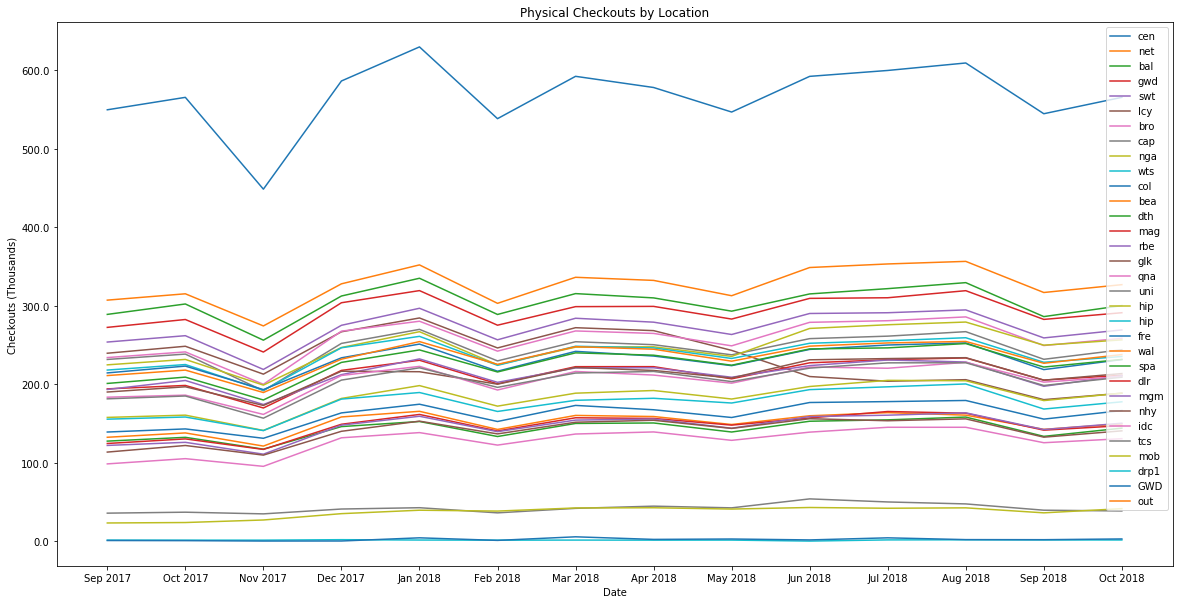

In [113]:
# Inventory by location over time

fig, ax = plt.subplots(figsize = (20, 10))

line1=plt.plot(physical_checkouts_by_locations.iloc[0, 1:],label = physical_checkouts_by_locations.iat[0,0])
line2=plt.plot(physical_checkouts_by_locations.iloc[1, 1:],label = physical_checkouts_by_locations.iat[1,0])
line3=plt.plot(physical_checkouts_by_locations.iloc[2, 1:],label = physical_checkouts_by_locations.iat[2,0])
line4=plt.plot(physical_checkouts_by_locations.iloc[3, 1:],label = physical_checkouts_by_locations.iat[3,0])
line5=plt.plot(physical_checkouts_by_locations.iloc[4, 1:],label = physical_checkouts_by_locations.iat[4,0])
line6=plt.plot(physical_checkouts_by_locations.iloc[5, 1:],label = physical_checkouts_by_locations.iat[5,0])
line7=plt.plot(physical_checkouts_by_locations.iloc[6, 1:],label = physical_checkouts_by_locations.iat[6,0])
line8=plt.plot(physical_checkouts_by_locations.iloc[7, 1:],label = physical_checkouts_by_locations.iat[7,0])
line9=plt.plot(physical_checkouts_by_locations.iloc[8, 1:],label = physical_checkouts_by_locations.iat[8,0])
line10=plt.plot(physical_checkouts_by_locations.iloc[9, 1:],label = physical_checkouts_by_locations.iat[9,0])
line11=plt.plot(physical_checkouts_by_locations.iloc[10, 1:],label = physical_checkouts_by_locations.iat[10,0])
line12=plt.plot(physical_checkouts_by_locations.iloc[11, 1:],label = physical_checkouts_by_locations.iat[11,0])
line13=plt.plot(physical_checkouts_by_locations.iloc[12, 1:],label = physical_checkouts_by_locations.iat[12,0])
line14=plt.plot(physical_checkouts_by_locations.iloc[13, 1:],label = physical_checkouts_by_locations.iat[13,0])
line15=plt.plot(physical_checkouts_by_locations.iloc[14, 1:],label = physical_checkouts_by_locations.iat[14,0])
line16=plt.plot(physical_checkouts_by_locations.iloc[15, 1:],label = physical_checkouts_by_locations.iat[15,0])
line17=plt.plot(physical_checkouts_by_locations.iloc[16, 1:],label = physical_checkouts_by_locations.iat[16,0])
line18=plt.plot(physical_checkouts_by_locations.iloc[17, 1:],label = physical_checkouts_by_locations.iat[17,0])
line19=plt.plot(physical_checkouts_by_locations.iloc[18, 1:],label = physical_checkouts_by_locations.iat[18,0])
line20=plt.plot(physical_checkouts_by_locations.iloc[19, 1:],label = physical_checkouts_by_locations.iat[18,0])
line21=plt.plot(physical_checkouts_by_locations.iloc[20, 1:],label = physical_checkouts_by_locations.iat[20,0])
line22=plt.plot(physical_checkouts_by_locations.iloc[21, 1:],label = physical_checkouts_by_locations.iat[21,0])
line23=plt.plot(physical_checkouts_by_locations.iloc[22, 1:],label = physical_checkouts_by_locations.iat[22,0])
line24=plt.plot(physical_checkouts_by_locations.iloc[23, 1:],label = physical_checkouts_by_locations.iat[23,0])
line25=plt.plot(physical_checkouts_by_locations.iloc[24, 1:],label = physical_checkouts_by_locations.iat[24,0])
line26=plt.plot(physical_checkouts_by_locations.iloc[25, 1:],label = physical_checkouts_by_locations.iat[25,0])
line27=plt.plot(physical_checkouts_by_locations.iloc[26, 1:],label = physical_checkouts_by_locations.iat[26,0])
line28=plt.plot(physical_checkouts_by_locations.iloc[27, 1:],label = physical_checkouts_by_locations.iat[27,0])
line29=plt.plot(physical_checkouts_by_locations.iloc[28, 1:],label = physical_checkouts_by_locations.iat[28,0])
line30=plt.plot(physical_checkouts_by_locations.iloc[29, 1:],label = physical_checkouts_by_locations.iat[29,0])
line31=plt.plot(physical_checkouts_by_locations.iloc[30, 1:],label = physical_checkouts_by_locations.iat[30,0])
line32=plt.plot(physical_checkouts_by_locations.iloc[31, 1:],label = physical_checkouts_by_locations.iat[31,0])


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))


plt.xlabel('Date')
plt.ylabel('Checkouts (Thousands)')
plt.title('Physical Checkouts by Location')

plt.legend(loc=1)

plt.savefig('physical_checkouts_by_location_over_time.png', bbox_inches='tight')

As you an see, most of the checkouts follow the same trends of ups and downs, except Lake City. I will show this in more detail in the next chart.

#### Inventory by Location Over Time (Top 10 excluding Centeral)

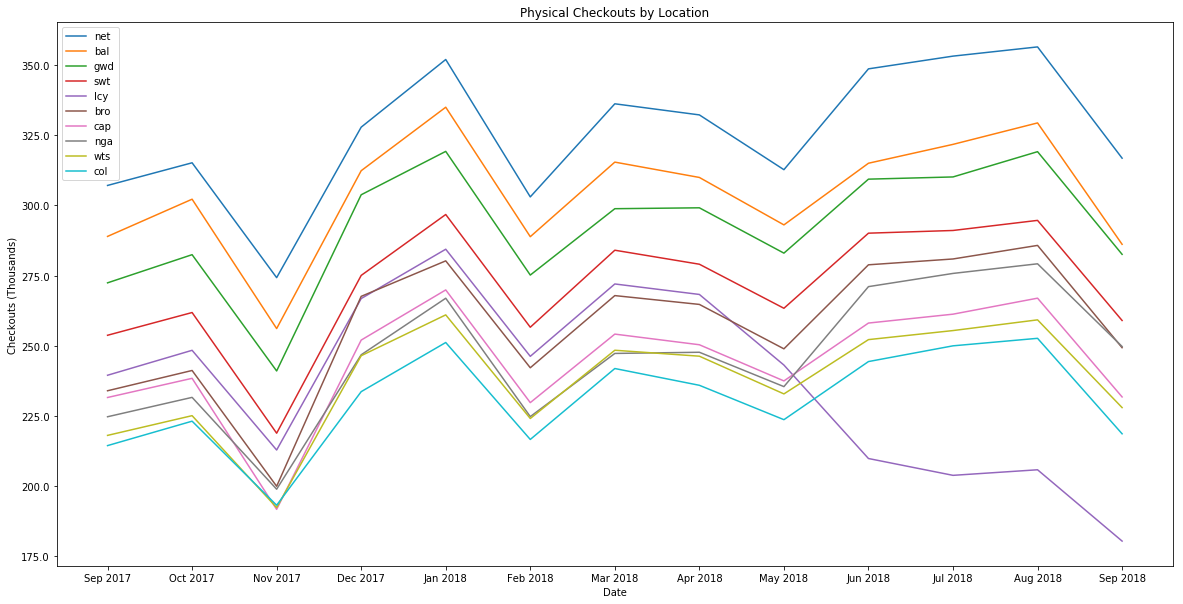

In [114]:
# Inventory by location over time - top ten not including cen

fig, ax = plt.subplots(figsize = (20, 10))

line2=plt.plot(physical_checkouts_by_locations.iloc[1, 1:-1],label = physical_checkouts_by_locations.iat[1,0])
line3=plt.plot(physical_checkouts_by_locations.iloc[2, 1:-1],label = physical_checkouts_by_locations.iat[2,0])
line4=plt.plot(physical_checkouts_by_locations.iloc[3, 1:-1],label = physical_checkouts_by_locations.iat[3,0])
line5=plt.plot(physical_checkouts_by_locations.iloc[4, 1:-1],label = physical_checkouts_by_locations.iat[4,0])
line6=plt.plot(physical_checkouts_by_locations.iloc[5, 1:-1],label = physical_checkouts_by_locations.iat[5,0])
line7=plt.plot(physical_checkouts_by_locations.iloc[6, 1:-1],label = physical_checkouts_by_locations.iat[6,0])
line8=plt.plot(physical_checkouts_by_locations.iloc[7, 1:-1],label = physical_checkouts_by_locations.iat[7,0])
line9=plt.plot(physical_checkouts_by_locations.iloc[8, 1:-1],label = physical_checkouts_by_locations.iat[8,0])
line10=plt.plot(physical_checkouts_by_locations.iloc[9, 1:-1],label = physical_checkouts_by_locations.iat[9,0])
line11=plt.plot(physical_checkouts_by_locations.iloc[10, 1:-1],label = physical_checkouts_by_locations.iat[10,0])


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))


plt.xlabel('Date')
plt.ylabel('Checkouts (Thousands)')
plt.title('Physical Checkouts by Location')

plt.legend()

plt.savefig('physical_checkouts_by_location_over_time_top_10.png', bbox_inches='tight')

You can see that for the most part, most of the locations follow a similar trend, except Lake City. This is a simialar trend as the inventory by location. Lake City had a decrese in inventory, and the physical checkouts decreased for that branch as well.

These results now make me think that the inventory levels might play a part in these results. I will not analyze this questions, but I will comment on it. I have noticed that the inventory checkout counts do in fact look like they are affeted by the location. However, the checkout counts also look like they might be affected by inventory counts. The locations with the highest invetory usually see the highest checkout counts. I would be interesting to investigate how each location gets the inventory levels they do, and if the inventory level is a great indecator of checkouts than just location. 

## Research Question 3: Is there a correlation between “floating” material and checkout counts over time? Floating material is material that can travel between branch locations.

I am interested in uderstanding this question because the inventory levels of each location can change becuase of this floating material. The floating items can be checked out and returned at different branch locations, and are also moved around to change the inventory levels at each branch, and therefore could affect the checkout patterns. 

I will create a few visualizations. 

*   The floating inventory counts by location for each year
*   The total floating inventory checkouts by location
*   The floating inventory checkouts by location over time.

I will first need to create the floating inventory datasubsets by year, and then group them into the catagories I need for each visualization. I will use the same data used in the analysis for physical checkouts by location because I need the checkout information, location and if the item is floating or not.

Note that the FloatingItem column in the Library Inventory Collection data is either "Floating" or "NA" becuase of this, I will read in each years library collection inventory data (save in a previous step) and change the "NA" to a string so I can compare the floating vs non-floating inventory levels. 

In [115]:
#read in data for 2018
library_collection_inventory_2018 = pd.read_csv("library_collection_inventory_2018_with_month.csv", sep=",", header=0, converters={ "FloatingItem": str})
floating_inventory_2018 = library_collection_inventory_2018.groupby(["ItemLocation", "month", "FloatingItem"], as_index = False)[["ItemCount"]].sum()
#read in data for 2017
library_collection_inventory_2017 = pd.read_csv("library_collection_inventory_2017_with_month.csv", sep=",", header=0, converters={ "FloatingItem": str})
floating_inventory_2017 = library_collection_inventory_2017.groupby(["ItemLocation", "month", "FloatingItem"], as_index = False)[["ItemCount"]].sum()

In [116]:
# Group data by floating and not floating for 2017 and 2018.
floating_vs_non_floating_2017 = floating_inventory_2017.groupby("FloatingItem", as_index = False)[["ItemCount"]].sum()
floating_vs_non_floating_2018 = floating_inventory_2018.groupby("FloatingItem", as_index = False)[["ItemCount"]].sum()

# Merge the two datasets, and rename the columns.
floating_vs_non_floating = pd.merge(floating_vs_non_floating_2017, floating_vs_non_floating_2018, on= "FloatingItem")
floating_vs_non_floating= floating_vs_non_floating.rename(columns = {"ItemCount_x": "2017", "ItemCount_y": "2018"})

In [117]:
floating_vs_non_floating

,FloatingItem,2017,2018
0,,5563631,15367745
1,Floating,984415,2655499


As you can see, there is a larger number of non-floating items than floating items. You can also see the number of items increased from 2017 to 2018. Which makes sense because there are only four months of data in 2017, and eleven months of data in 2018. So I would expect the values in 2018 to be higher.

In [118]:
floating_by_location_2018 = floating_inventory_2018.groupby(["ItemLocation", "FloatingItem"], as_index = False)[["ItemCount"]].sum()
floating_by_location_2017 = floating_inventory_2017.groupby(["ItemLocation", "FloatingItem"], as_index = False)[["ItemCount"]].sum()

### Floating Inventory By Location

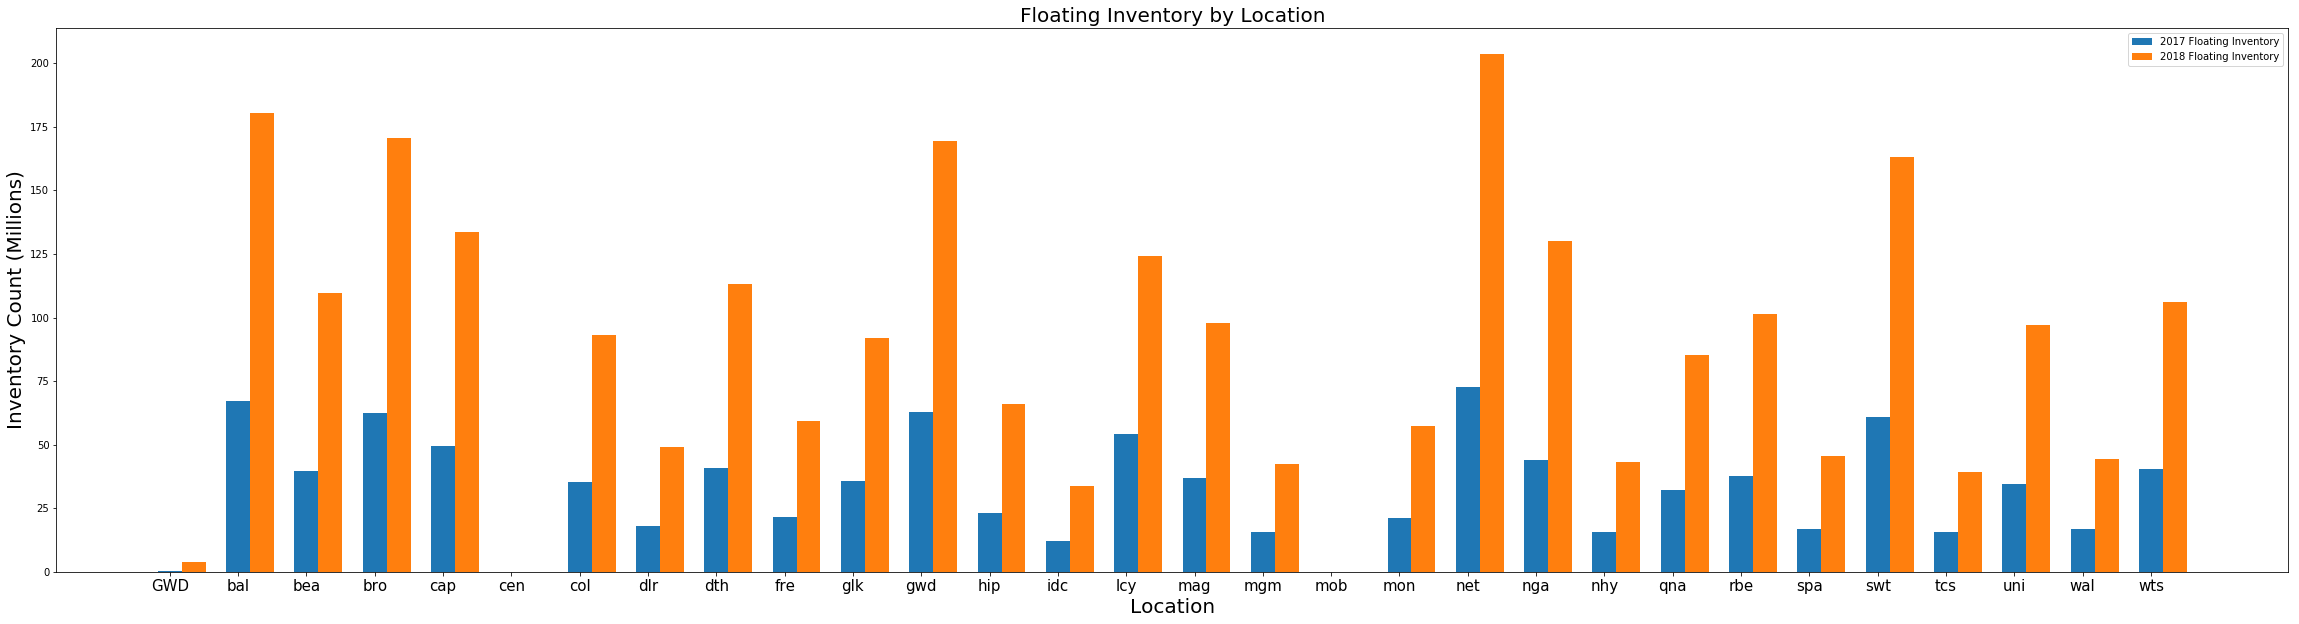

In [119]:
# create floating inventory by location

fig, ax = plt.subplots(figsize=(40, 10))
ind = np.arange(0, 30, 1)
width = .35

table1 = floating_by_location_2017[floating_by_location_2017.FloatingItem == "Floating"]
rects1 = plt.bar(ind, table1["ItemCount"], width, label='2017 Floating Inventory')

table2 = floating_by_location_2018[floating_by_location_2018.FloatingItem == "Floating"]
rects2 = plt.bar(ind + width, table2["ItemCount"], width,label='2018 Floating Inventory')

# this is a function to create my y-axis tick marks in groups of 1,000
def inventory_ticks(count, ticks):
    value = count / 1000
    return int(value)

ax.yaxis.set_major_formatter(plt.FuncFormatter(inventory_ticks))
 
plt.xlabel('Location', fontsize = 20)
plt.ylabel('Inventory Count (Millions)', fontsize = 20)
plt.title('Floating Inventory by Location', fontsize = 20)

ax.set_xticks(ind)
ax.set_xticklabels((table1["ItemLocation"]), fontsize = 15)

plt.legend()

plt.savefig('floating_inventory_by_location.png', bbox_inches='tight')

From this chart you can see the floating inventory varies significantly. What is interesting to me is that the Centeral Location has the largest invetory for physical materail, but almost no floating material.

Now that I have an understanding about the floating inventory by location, I will now look at the floating checkout counts by location (the other two visualizations I wanted to create).

First I will create the datasets and then plot the results. As with the section above, I will re-imprt the checkouts by location and convert the "NA"s in the "FloatingItem" column to strings. 

In [120]:
checkouts_by_location_2017 = pd.read_csv('checkouts_by_location_2017.csv', sep=",", header=0, converters={ "FloatingItem": str})
checkouts_by_location_2018 = pd.read_csv('checkouts_by_location_2018.csv', sep = ",", header=0, converters={ "FloatingItem": str})

Now that I have imported the data, I can create my datasubsets by month and year for floating item checkouts.

In [121]:
# 2017 by month
floating_checkouts_by_location_by_month_2017 = checkouts_by_location_2017.groupby(["CheckoutYear", 
                                                                                   "CheckoutMonth",
                                                                                   "ItemLocation",
                                                                                   "FloatingItem"], 
                                                                                  as_index = False)[["Checkouts"]].sum()
# 2017 by year
floating_checkouts_by_location_2017 = floating_checkouts_by_location_by_month_2017.groupby(["CheckoutYear", 
                                                                                            "ItemLocation",
                                                                                            "FloatingItem"],
                                                                                           as_index = False)[["Checkouts"]].sum()
#2018 by month
floating_checkouts_by_location_by_month_2018 = checkouts_by_location_2018.groupby(["CheckoutYear", 
                                                                                   "CheckoutMonth",
                                                                                   "ItemLocation",
                                                                                   "FloatingItem"], 
                                                                                  as_index = False)[["Checkouts"]].sum()
#2018 by year
floating_checkouts_by_location_2018 = floating_checkouts_by_location_by_month_2018.groupby(["CheckoutYear", 
                                                                                            "ItemLocation",
                                                                                            "FloatingItem"],
                                                                                           as_index = False)[["Checkouts"]].sum()


I will now join the floating checkouts by year into one table to create the first visualization.

In [122]:
frames = (floating_checkouts_by_location_2017, floating_checkouts_by_location_2018)
          
floating_checkouts_by_location = pd.concat(frames, join="outer", ignore_index = True)

In [123]:
floating_checkouts_by_location.head()

,CheckoutYear,ItemLocation,FloatingItem,Checkouts
0,2017,GWD,Floating,1488
1,2017,bal,,711608
2,2017,bal,Floating,448074
3,2017,bea,,532722
4,2017,bea,Floating,317443


Now that I have joined the two years, I needd to create the datasets that total the checkouts by location. I will first groups this data on Item Locaiton and Floating Items, and then create a table that has the floating checkouts in one column and non-floating checkouts in another column by location.

In [124]:
total_floating_checkouts = floating_checkouts_by_location.groupby(["ItemLocation", "FloatingItem"], 
                                                                  as_index = False)[["Checkouts"]].sum()

In [125]:
temp = total_floating_checkouts[total_floating_checkouts.FloatingItem == "Floating"]
temp2 = total_floating_checkouts[total_floating_checkouts.FloatingItem != "Floating"]
temp3 = pd.merge(temp, temp2, on= "ItemLocation", how="outer")
temp3 = temp3.sort_values(by = "ItemLocation").rename(columns = {"Checkouts_x": "FloatingCheckouts",
                                                                "Checkouts_y": "NonFloatingCheckouts"})

### Total Floating Inventory Checkouts by Location

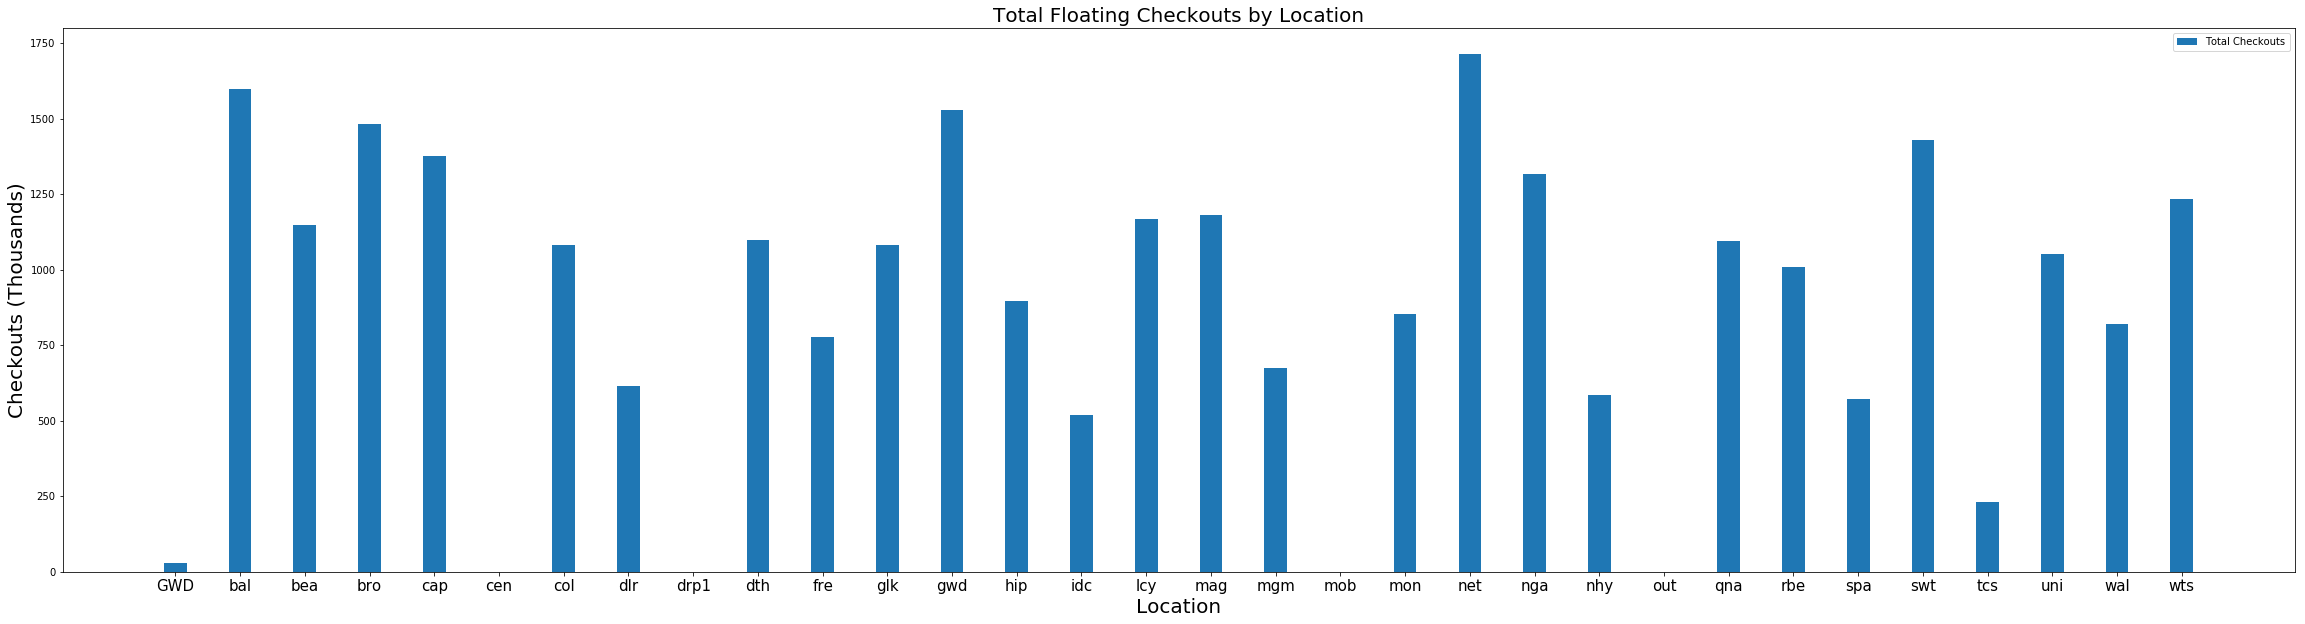

In [126]:
# create checkouts of floating inveontry by location

fig, ax = plt.subplots(figsize=(40, 10))
ind = np.arange(0, 32, 1)
width = .35

                                
rects1 = plt.bar(ind, temp3["FloatingCheckouts"], width, label='Total Checkouts')


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return int(value)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))

 
plt.xlabel('Location', fontsize = 20)
plt.ylabel('Checkouts (Thousands)', fontsize = 20)
plt.title('Total Floating Checkouts by Location', fontsize = 20)

ax.set_xticks(ind)
ax.set_xticklabels((temp3["ItemLocation"]), fontsize = 15)

plt.legend()

plt.savefig('total_floating_checkouts_by_location.png', bbox_inches='tight')

From this you can see that there are a few locations that have no floating inventory checkouts. Which makes sense because these locations have no floating inventory. You can see the location (net) witht he highest floating checkouts is also the location with the highest floating inventory as well.

Now I want to see if there are any trends over time. So will need to create the datasets, and then create the plots. I first will merge the floating checkouts by month data into one table. Then I will perform some data cleanup by dropping columns I don't need, and finally creating my visualization.

In [127]:
frames2 = (floating_checkouts_by_location_by_month_2017, floating_checkouts_by_location_by_month_2018)
          
floating_checkouts_by_location_by_month = pd.concat(frames2, join="outer", ignore_index = True)

In [128]:
# Create a date column so I can create a line graph over time.
floating_checkouts_by_location_by_month["day"] = 1
floating_checkouts_by_location_by_month["year"] = floating_checkouts_by_location_by_month["CheckoutYear"]
floating_checkouts_by_location_by_month["month"] = floating_checkouts_by_location_by_month["CheckoutMonth"]
floating_checkouts_by_location_by_month["date"] = pd.to_datetime(floating_checkouts_by_location_by_month[['year',
                                                                                                'month',
                                                                                                'day']])

In [129]:
floating_checkouts_by_location_by_month.head()

,CheckoutYear,CheckoutMonth,ItemLocation,FloatingItem,Checkouts,day,year,month,date
0,2017,9,GWD,Floating,734,1,2017,9,2017-09-01
1,2017,9,bal,,167822,1,2017,9,2017-09-01
2,2017,9,bal,Floating,121139,1,2017,9,2017-09-01
3,2017,9,bea,,124747,1,2017,9,2017-09-01
4,2017,9,bea,Floating,86234,1,2017,9,2017-09-01


I need to create monthy datasets, then only keep the Floating checkouts data. First I will create the monthly datasets. Then only keep the rows that are Floating Checkoust, and finally create a table with location as the rows and the monthly checkouts as the columns.

In [130]:
# Create the monthly checkouts...
sep2017 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2017-09-01"].reset_index(drop = True)
oct2017 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2017-10-01"].reset_index(drop = True)
nov2017 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2017-11-01"].reset_index(drop = True)
dec2017 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2017-12-01"].reset_index(drop = True)

jan2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-01-01"].reset_index(drop = True)
feb2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-02-01"].reset_index(drop = True)
mar2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-03-01"].reset_index(drop = True)
apr2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-04-01"].reset_index(drop = True)
may2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-05-01"].reset_index(drop = True)
jun2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-06-01"].reset_index(drop = True)
jul2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-07-01"].reset_index(drop = True)
aug2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-08-01"].reset_index(drop = True)
sep2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-09-01"].reset_index(drop = True)
oct2018 = floating_checkouts_by_location_by_month[floating_checkouts_by_location_by_month.date == "2018-10-01"].reset_index(drop = True)

In [131]:
# Keep only floating data, and droping all other columns, and rename the columns...
sep2017 = sep2017[sep2017.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Sep 2017"})

In [132]:
sep2017.head()

,ItemLocation,Sep 2017
0,GWD,734
2,bal,121139
4,bea,86234
6,bro,111052
8,cap,106241


In [133]:
# here I will do it for the rest of the months.....
oct2017 = oct2017[oct2017.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Oct 2017"})
nov2017 = nov2017[nov2017.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Nov 2017"})
dec2017 = dec2017[dec2017.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Dec 2017"})

jan2018 = jan2018[jan2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Jan 2018"})
feb2018 = feb2018[feb2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Feb 2018"})
mar2018 = mar2018[mar2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Mar 2018"})
apr2018 = apr2018[apr2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Apr 2018"})
may2018 = may2018[may2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "May 2018"})
jun2018 = jun2018[jun2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Jun 2018"})
jul2018 = jul2018[jul2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Jul 2018"})
aug2018 = aug2018[aug2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Aug 2018"})
sep2018 = sep2018[sep2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Sep 2018"})
oct2018 = oct2018[oct2018.FloatingItem == "Floating"].drop(columns=["CheckoutYear", "CheckoutMonth", "day", 
                                                            "year", "month","date","FloatingItem"]).rename(columns={"Checkouts": "Oct 2018"})


In [134]:
# Merge the datasets into one table....

floating = pd.merge(sep2017, oct2017, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, nov2017, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, dec2017, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, jan2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, feb2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, mar2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, apr2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, may2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, jun2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, jul2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, aug2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, sep2018, on = "ItemLocation", how = "outer")
floating = pd.merge(floating, oct2018, on = "ItemLocation", how = "outer")

### Floating Inventory by Location Over Time

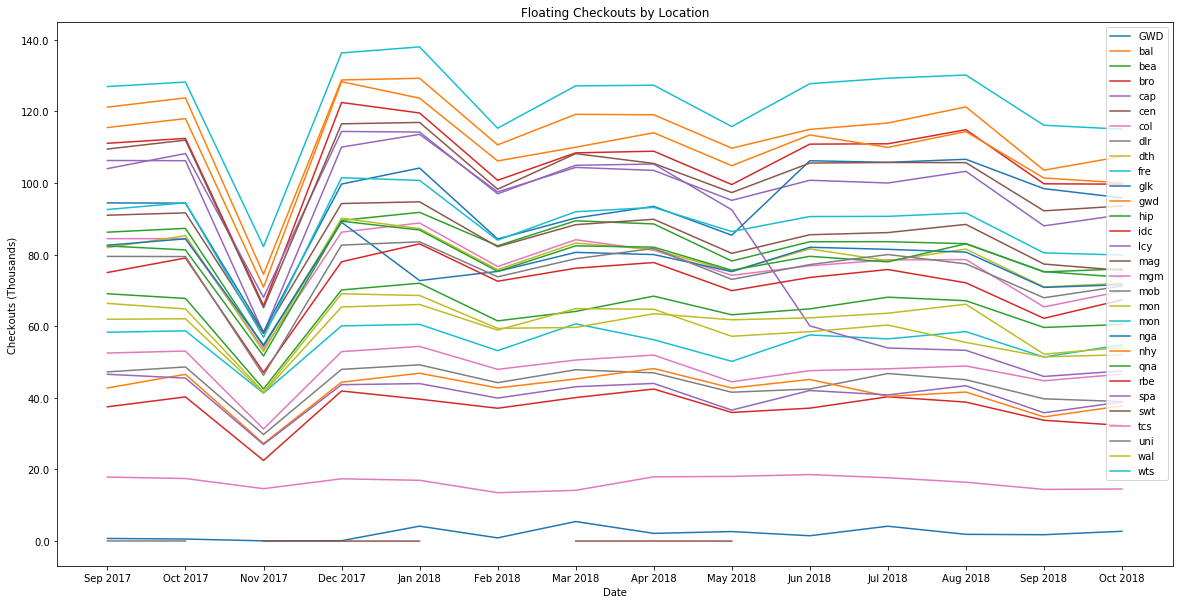

In [135]:
# create checkouts of floating inveontry by location by month

fig, ax = plt.subplots(figsize=(20, 10))

line1=plt.plot(floating.iloc[0, 1:],label = floating.iat[0,0])
line2=plt.plot(floating.iloc[1, 1:],label = floating.iat[1,0])
line3=plt.plot(floating.iloc[2, 1:],label = floating.iat[2,0])
line4=plt.plot(floating.iloc[3, 1:],label = floating.iat[3,0])
line5=plt.plot(floating.iloc[4, 1:],label = floating.iat[4,0])
line6=plt.plot(floating.iloc[5, 1:],label = floating.iat[5,0])
line7=plt.plot(floating.iloc[6, 1:],label = floating.iat[6,0])
line8=plt.plot(floating.iloc[7, 1:],label = floating.iat[7,0])
line9=plt.plot(floating.iloc[8, 1:],label = floating.iat[8,0])
line10=plt.plot(floating.iloc[9, 1:],label = floating.iat[9,0])
line11=plt.plot(floating.iloc[10, 1:],label = floating.iat[10,0])
line12=plt.plot(floating.iloc[11, 1:],label = floating.iat[11,0])
line13=plt.plot(floating.iloc[12, 1:],label = floating.iat[12,0])
line14=plt.plot(floating.iloc[13, 1:],label = floating.iat[13,0])
line15=plt.plot(floating.iloc[14, 1:],label = floating.iat[14,0])
line16=plt.plot(floating.iloc[15, 1:],label = floating.iat[15,0])
line17=plt.plot(floating.iloc[16, 1:],label = floating.iat[16,0])
line18=plt.plot(floating.iloc[17, 1:],label = floating.iat[17,0])
line19=plt.plot(floating.iloc[18, 1:],label = floating.iat[18,0])
line20=plt.plot(floating.iloc[19, 1:],label = floating.iat[18,0])
line21=plt.plot(floating.iloc[20, 1:],label = floating.iat[20,0])
line22=plt.plot(floating.iloc[21, 1:],label = floating.iat[21,0])
line23=plt.plot(floating.iloc[22, 1:],label = floating.iat[22,0])
line24=plt.plot(floating.iloc[23, 1:],label = floating.iat[23,0])
line25=plt.plot(floating.iloc[24, 1:],label = floating.iat[24,0])
line26=plt.plot(floating.iloc[25, 1:],label = floating.iat[25,0])
line27=plt.plot(floating.iloc[26, 1:],label = floating.iat[26,0])
line28=plt.plot(floating.iloc[27, 1:],label = floating.iat[27,0])
line29=plt.plot(floating.iloc[28, 1:],label = floating.iat[28,0])
line30=plt.plot(floating.iloc[29, 1:],label = floating.iat[29,0])


# this is a function to create my y-axis tick marks in groups of 1,000.
def checkout_ticks(count, ticks):
    value = count / 1000
    return round(value, 1)

ax.yaxis.set_major_formatter(plt.FuncFormatter(checkout_ticks))


plt.xlabel('Date')
plt.ylabel('Checkouts (Thousands)')
plt.title('Floating Checkouts by Location')

plt.legend(loc=1)

plt.savefig('floating_checkouts_by_location_over_time.png', bbox_inches='tight')

As you can see from this table there ar some interesting trends over time. For the most part every locaiton sees a sharp decrese in checkouts in Nov 2017, and then rises back up in December. I would guess that this might have something to do with the holidays, but I am not sure. 

A future analysis would be to see if inventory levels have anything to do with these trends. If you remember, the centeral location had very few floating inventory items, and therefore almost no floating checkouts at the year aggrigation. You can also see that Lake City sees a sharp decrease in floating checkouts (the purple line that begins to drop in April 2018), which is about the same time the physical inventory for that location starts dropping. 

## Research Question 4: Are there any Interesting Trends in the Item Type?
I am interesting in this beause it could change the types of items that are inventory. For this analysis, I will create tables for the items with the highest checkout and highest inventory for 2017 and 2018.

I will use the **checkout_by_location_2017** and **checkouts_by_location_2018** becasue they already merged the inventory and checkouts by title data. I will then need to merge the ILS Data Dictionary to get the ItemType description.

The Item Type is a code, that means very little. But the discription is very useful.

If you have run through this entier notebook in one sitting, you don't have to reload the data. You can just comment these out or skip over this chunk of code.

In [136]:
# Load all the required datasets
checkouts_by_location_2017 = pd.read_csv('checkouts_by_location_2017.csv', sep=",", header=0) #loading previously saved data.
checkouts_by_location_2018 = pd.read_csv('checkouts_by_location_2018.csv', sep=",", header=0) #loading previously saved data.
ils_data_dictionary = pd.read_csv("Integrated_Library_System__ILS__Data_Dictionary.csv", sep=",", header=0)

In [139]:
ils_data_dictionary.head()

,Code,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,acart,Framed Art: Adult/YA,ItemType,Media,Art,NaN,NaN
1,acbk,Book: Adult/YA,ItemType,Print,Book,NaN,NaN
2,accas,Audio Tape: Adult/YA,ItemType,Media,Audio Tape,NaN,NaN
3,accd,CD: Adult/YA,ItemType,Media,Audio Disc,NaN,NaN
4,accdrom,CD-ROM: Adult/YA,ItemType,Media,Data Disc,NaN,NaN


Now that I have all the data loaded, I need to merge on *ItemType* in **checkouts_by_location** and *Code* in **ils_data_dictionary**, I need to change one of the column titles before merging. 

In [140]:
# change the column title of the ILS data

ils_data_dictionary = ils_data_dictionary.rename(columns = {"Code": "ItemType"})

In [141]:
ils_data_dictionary.head()

,ItemType,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,acart,Framed Art: Adult/YA,ItemType,Media,Art,NaN,NaN
1,acbk,Book: Adult/YA,ItemType,Print,Book,NaN,NaN
2,accas,Audio Tape: Adult/YA,ItemType,Media,Audio Tape,NaN,NaN
3,accd,CD: Adult/YA,ItemType,Media,Audio Disc,NaN,NaN
4,accdrom,CD-ROM: Adult/YA,ItemType,Media,Data Disc,NaN,NaN


Now i need to concatenate the checkouts by item type datasets, and then join that to the ILS Data Dictionary

In [142]:
frames3 = (checkouts_by_location_2017, checkouts_by_location_2018)
checkouts_by_location_complete = pd.concat(frames3, join="outer", ignore_index = True)

In [143]:
checkouts_by_item_type = pd.merge(checkouts_by_location_complete, ils_data_dictionary,
                                  on = "ItemType",how = "inner")

In [144]:
checkouts_by_item_type.head()#check column titles

,Unnamed: 0,BibNum,Title,Author,ISBN,PublicationYear_x,Publisher_x,Subjects_x,ItemType,ItemCollection,...,Publisher_y,PublicationYear_y,day,report_date,Description,Code Type,Format Group,Format Subgroup,Category Group,Category Subgroup
0,0,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,...,"Sentai Filmworks,",[2015],1,2017-10-01,DVD: Adult/YA,ItemType,Media,Video Disc,NaN,NaN
1,1,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,nalndvd,...,"Sentai Filmworks,",[2015],1,2017-10-01,DVD: Adult/YA,ItemType,Media,Video Disc,NaN,NaN
2,2,3186270,"Haikyu!!. Collection 2, episodes 14-25 [videor...",NaN,NaN,[2015],"Sentai Filmworks,","High school students Drama, Volleyball players...",acdvd,calndvd,...,"Sentai Filmworks,",[2015],1,2017-10-01,DVD: Adult/YA,ItemType,Media,Video Disc,NaN,NaN
3,27,2530659,The shining [videorecording] / Warner Bros. Pi...,NaN,"1419814842, 9781419814846",[2007],"Distributed by Warner Home Video,","Hotelkeepers Drama, Ghost plays, Haunted hotel...",acdvd,nadvd,...,"Distributed by Warner Home Video,",[2007],1,2017-10-01,DVD: Adult/YA,ItemType,Media,Video Disc,NaN,NaN
4,28,2530659,The shining [videorecording] / Warner Bros. Pi...,NaN,"1419814842, 9781419814846",[2007],"Distributed by Warner Home Video,","Hotelkeepers Drama, Ghost plays, Haunted hotel...",acdvd,nadvd,...,"Distributed by Warner Home Video,",[2007],1,2017-10-01,DVD: Adult/YA,ItemType,Media,Video Disc,NaN,NaN


In [145]:
checkouts_by_item_type.to_csv("checkouts_by_item_type.csv") # save this file...

Now that I have a subset of the data I want, I can check by year and month of the inventory and checkouts of the Item Type. I will only display this by year, however I created datasets that include months as well. 

Further analysis could be done on how the Item type changes by location or floating type. This could be useful in understanding which locatinos have higher demands for specific Item Types .

In [146]:
# Checkouts
top_checkouts_by_item_type = checkouts_by_item_type.groupby(["year", "month", "Description"],
                                                            as_index = False)[["Checkouts"]].sum()

In [147]:
# Inventory
top_inventory_by_item_type = checkouts_by_item_type.groupby(["year", "month", "Description"],
                                                            as_index = False)[["ItemCount"]].sum()

Next, I will group the checkout data and inventory data by year (since I am interested in information at the year level).

In [148]:
ranked_checkouts_by_item_type = top_checkouts_by_item_type.groupby(["year", "Description"],
                                                                   as_index = False)[["Checkouts"]].sum()
ranked_checkouts_by_item_type_2017 = ranked_checkouts_by_item_type[ranked_checkouts_by_item_type.year == 2017]
ranked_checkouts_by_item_type_2018 = ranked_checkouts_by_item_type[ranked_checkouts_by_item_type.year == 2018]

ranked_inventory_by_item_type = top_inventory_by_item_type.groupby(["year", "Description"],
                                                                   as_index = False)[["ItemCount"]].sum()
ranked_inventory_by_item_type_2017 = ranked_inventory_by_item_type[ranked_inventory_by_item_type.year == 2017]
ranked_inventory_by_item_type_2018 = ranked_inventory_by_item_type[ranked_inventory_by_item_type.year == 2018]

Finally, I will dispaly the top 10 of each table.

### Top 10 Most checked out Items by Item Type

In [149]:
ranked_checkouts_by_item_type.sort_values(by = "Checkouts", ascending = False).head(10)

,year,Description,Checkouts
41,2018,Book: Juv,21619687
39,2018,Book: Adult/YA,20033143
49,2018,DVD: Adult/YA,11198795
6,2017,Book: Juv,8020810
4,2017,Book: Adult/YA,7328663
68,2018,Peak Picks Book,5143287
13,2017,DVD: Adult/YA,4432692
45,2018,CD: Adult/YA,2850805
50,2018,DVD: Juv Circulating,2078150
9,2017,CD: Adult/YA,1039253


### Top 10 Highest Inventory Items by Item Type 

In [150]:
ranked_inventory_by_item_type.sort_values(by = "ItemCount", ascending = False).head(10)

,year,Description,ItemCount
39,2018,Book: Adult/YA,3784547
41,2018,Book: Juv,3188475
4,2017,Book: Adult/YA,1442855
6,2017,Book: Juv,1217102
49,2018,DVD: Adult/YA,1116380
45,2018,CD: Adult/YA,703172
13,2017,DVD: Adult/YA,375074
50,2018,DVD: Juv Circulating,241941
9,2017,CD: Adult/YA,240977
68,2018,Peak Picks Book,171446


From the tables, you can see that the highest checkout items are also the items types with the highest inventory. 

### Top 10 Most checked out Items by Item Type for 2017

In [151]:
ranked_checkouts_by_item_type_2017.sort_values(by = "Checkouts", ascending = False).head(10)

,year,Description,Checkouts
6,2017,Book: Juv,8020810
4,2017,Book: Adult/YA,7328663
13,2017,DVD: Adult/YA,4432692
9,2017,CD: Adult/YA,1039253
30,2017,Peak Picks Book,1003861
14,2017,DVD: Juv Circulating,703525
10,2017,CD: Juv,92390
24,2017,Laptop: Hourly Circulating,41236
7,2017,Book: Ref Adult/YA,18042
19,2017,Equipment: Ref Adult/YA,12365


### Top 10 Highest Inventory Items by Item Type for 2017

In [152]:
ranked_inventory_by_item_type_2017.sort_values(by = "ItemCount", ascending = False).head(10)

,year,Description,ItemCount
4,2017,Book: Adult/YA,1442855
6,2017,Book: Juv,1217102
13,2017,DVD: Adult/YA,375074
9,2017,CD: Adult/YA,240977
14,2017,DVD: Juv Circulating,79439
30,2017,Peak Picks Book,37312
10,2017,CD: Juv,30061
7,2017,Book: Ref Adult/YA,10199
27,2017,Music Score: Adult/ya,3175
17,2017,Equipment: Adult/YA,2172


As you can see from these two tables, the top two items in inventory and top item for checkouts for 2017 are switched. However the itmes in the top ten checked out items and the top most items in inventory are almost identical lists, just the order is a littel different. One thing to see is that in the top most checked out item type, you see "Laptop: Hourly Circulating" as the 8th most checked out item, an it doesn't show up onthe top highes inventory item for 2017. You can also see that "Music Score: Adult/ya" is one of the highest inventory items in 2017 (ranked 9), but does not make the top checked out items.

### Top 10 Most checked out Items by Item Type for 2018

In [153]:
ranked_checkouts_by_item_type_2018.sort_values(by = "Checkouts", ascending = False).head(10)

,year,Description,Checkouts
41,2018,Book: Juv,21619687
39,2018,Book: Adult/YA,20033143
49,2018,DVD: Adult/YA,11198795
68,2018,Peak Picks Book,5143287
45,2018,CD: Adult/YA,2850805
50,2018,DVD: Juv Circulating,2078150
46,2018,CD: Juv,317052
61,2018,Laptop: Hourly Circulating,203283
55,2018,Equipment: Ref Adult/YA,44442
42,2018,Book: Ref Adult/YA,42513


### Top 10 Highest Inventory Items by Item Type for 2018

In [154]:
ranked_inventory_by_item_type_2018.sort_values(by = "ItemCount", ascending = False).head(10)

,year,Description,ItemCount
39,2018,Book: Adult/YA,3784547
41,2018,Book: Juv,3188475
49,2018,DVD: Adult/YA,1116380
45,2018,CD: Adult/YA,703172
50,2018,DVD: Juv Circulating,241941
68,2018,Peak Picks Book,171446
46,2018,CD: Juv,94180
42,2018,Book: Ref Adult/YA,25237
65,2018,Music Score: Adult/ya,10363
53,2018,Equipment: Adult/YA,5756


If you compare these two tables with their corresponding tables for 2017, they are almost idential in ranking. The only difference in ranking is the most checked out items "Peak Picks Book" and "CD: Adult/YA" switched rankings between 2017 and 2018. The rankings for the highest inventory counts stays the same between 2017 and 2018.

This finding also helps enforse my hypothesis that inventory levels play a large part in the checkouts. However, since I have not anlalized this, I can not confirm this assumption.

# Discussion

## Human Centered Design Concepts
The data collected is on book checkout patterns by humans who use the Seattle Public Library as a resource, and therefore the data collected, as well as any analysis on that data will have human impacts. A major use for this analysis could be used to inform changes in the availability of certain titles to different branch locations or material types. This could result in increased or decreases the access to the libraries inventory types (digital materal, pysical material) or could change the access based on the branch location. This could have large human impacts on a resource that ideally are equally accessable by all.

## Limitations
One of the major concerns/limitations to this analysis is the assumption of universal access to the library and its resources.
This data assumes that everyone has access to the library locations or its electronic material, however that is not necessarily true. 
Below are the requirements to get a free library card and can be found on the Seattle Public Library website. 

**Everyone who lives, works, goes to school or owns property in King County (except Yarrow Point and Hunts Point) can get a free Library card. Apply online, then visit any Library location to pick up your card.**

The quote above can be found on the Seattle Public Library's website as well as other requriments to obtain a library card. The link for this can be found here: https://www.spl.org/using-the-library/get-started/get-started-with-a-library-card.

You must also show a valid photo ID and something that proves you meet the above requirements. This is broad list of people eligible to receive a free library card, however if you do not meet these requirements, there is a fee to get a library card. This means there is a portion of people who might not be able to get a library card due to the financial burden of not being able to prove they meet the requirements laid out by the Seattle Public Library.

Another limitation to the data collected is the availability of transportation to a physical location. If a person wants to check out a specific title that is only at a specific location, the ability to travel to that branch might not be available. Convenient public transportation, limitations in parking locations, and ability go during the hours of operations can be challenging for some and can skew the data that the library collects. 

Another limitation to the data collected is access to printed materials and electronic material can be limited. For the printed material, the number of printed copies might hinder your ability to check out the title. In the case of electronic material, access to an e-reader, computer or reliable internet connection can hinder some from checking out electronic material (i.e.  e-readers, computers and reliable internet connection require the ability to pay for these objects and services).

## Future Work
By performing this analysis, I have come up with additional research questions that I did not have time to explore but I think could be informative. I will list them out.

* an analysis on checkouts by material type (i.e, book, e-book, video casset, DVD, etc.)
* an analysis on the impacts of inventory levels for material checkouts
* an analysis on how inventory gets allocationed to each branch
* an anlaysis on how floating inventory get decided and allocated to each branch
* an analysis on access to each branch location (public transit, parking, which neighborhoods the branches are in)

# Conclusion

In conclusion, I would like to perform additional analysis before I can draw any informative suggestions about the Seattle public library. As I was performing my analysis, more questions and interactions between variables arose. However, I can provide some general things to note for each of my research questions.


## Is there a trend in digital material checkouts over printed material checkouts? 
The answer to this question is yes, there are some trends to note in the checkouts by digital and physical material. From about 2012 onward, there looks to be a steady number of total checkouts. In addition, there has been a steady increase of digital material checkouts, and a steady decrease of physical checkouts. Since I did not perform a detailed study on the inventory. A more detialed study on inventory levels of each of these should be done to determine if any changes to invnetory would be benificial. 
## Is there a correlation between library location and printed material checkout numbers over time?  
Based on the analysis I performed there seems to be a large correlation between branch location and physical materail checkouts. However, I believe that the inventory levels of each branch plays a huge role in this. Since I did not perform an analysis on the effects of inventory levels I can not confirm this. However, from the visualizations I produced, it looks like the locations with the highest inventory saw the highest checkouts. This can be demonstrated by the Centeral Location having the highest inventory of physical materials and also the highest checkouts of those materials. One could normalize this data by using the average checkouts by title at each locaiton and see if any thing pops out. I believe inventory levels also play a role in this answer because the Lake City branch had a decline in checkouts of their physical materal around the same time as the branches physical material inventory was reduced.
## Is there a correlation between “floating” material and checkout counts over time? I
The answer to this questions is yes, it seems to follow the same paterns as the physical material checkouts, but more detialed analysis would be needed to answer difinitivly. The branches that had the largest floating inventory, saw the highest checkouts of that material. An interesting follow-on would be to see if you could track the floating inventory patters and see if that has an effect on checkout patersn.
## Are there any interesting trends in the types of items being checked out?
Since there is only a small sample size, it is difficult to see any trends or changes. For the most part, the highest checked out items for 2017 was the same for 2018, and the most checked out item types were also the item types with the larges inventory.